## **Introduction**
Natural Language Processing (NLP) is a branch of Artificial Intelligence (AI) that deals with computer science and human language. It is a union of linguistics, computer science and artificial intelligence. In short, computer algorithms should be able to analyse and process natural language. Identifying hate speech on social media, detection of reviews, analysing opinion & arguments, speech recognition, natural language generation are some of the use cases of NLP. It is a known fact that the computer understands programs only supplied in a highly structured language. The main challenge here is that natural language is not precise, ambiguous, no fixed length, varied social context, regional influences. Thus, developing computational algorithms to unveil the emotions behind the large text is a challenging task. 

Over the last decades, several machine learning models were used to analyse the text and were able to achieve great results. But classical methods involved more time for text processing which included important feature selection, instead of understanding the data and the context of the words within the sentences. But in the last few years, deep learning has made a tremendous improvement in developing state of art algorithms such as Recurrent Neural Network(RNN), Long Short Term Memory (LSTM) and Transformer etc that are also supported by high powered computation capacities and make NLP more powerful and interesting. 


## **Project Description**
This project deals with the classification of music genres from a database [https://www.kaggle.com/mateibejan/multilingual-lyrics-for-genre-classification?select=train.csv] that contains lyrics to a song, as well as the artist, song title, language and genre associated with that song. The project is divided into 3 parts, lyrics prediction, transfer learning and finally building a model for the top three most frequent genres. The goal of this assignment is to build a deep learning model for the purpose of performing genre analysis on the dataset.  
We have used many deep learning algorithms such as Recurrent Neural Network (RNN), Long ShortTerm Memory (LSTM) and Convolutional Neural Network (CNN) and different variants of them and we have used embedding that helps us to reduce the dimensionality. And we have also used a pre-trained model (GloVe: Global Vectors for Word Representation) and compared the same with other models that we have built during the project. Next, we have used the concept of transfer learning, based on the model we have created, then we have used the same model to recognise the artists instead of genres. And finally, we have generated our own lyrics for a particular genre of music.

### ***Part 1: Lyrics Generation Prediction***

The task of this section is to apply deep learning techniques such as SimpleRNN, LSTM and CNN in predicting genres of the music from the given lyric. And next, compare the performance of each of these models. We have used Numpy, Pandas, Matplotlib, Seaborn, nltk, TensorFlow and Keras etc. libraries to complete the task.

#### ***Initialisation***

In [ ]:
# Importing all the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = [7,7]

import seaborn as sns
sns.set_theme(style="darkgrid")
from wordcloud import WordCloud, ImageColorGenerator

import random
import string
from collections import Counter
from string import digits

import nltk
#nltk.download('stopwords')

import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, SimpleRNN, GlobalAveragePooling1D, Conv1D, GlobalMaxPooling1D, MaxPooling1D


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading Training data
url= '/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/train.csv'


train = pd.read_csv(url, sep=',')

# First 5 rows of the dataset
train.head()

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...


#### ***Explotatory Data Analysis with Training Data***

Treatment for Language

In [ ]:
# Total no of entries for each of the langauges
train['Language'].value_counts().sort_values(ascending=False)

en    250197
pt     30102
es      3892
ro      1184
it       808
id       737
fr       644
de       478
sw       304
tl       241
so       229
cy       226
ca       137
tr       116
nl       116
sk        98
hr        97
no        93
af        77
sl        77
da        71
sv        61
et        58
fi        54
pl        24
cs        17
sq        15
hu        10
vi         7
ru         4
lv         2
lt         2
ko         1
Name: Language, dtype: int64

Since in the test data we do not have any information regarding the language and the training dataset shows the main language is English as as we can see, the dataset is dominated by English language, and comapre to that the presence of the other languages are negligible. Therefore, we remove all the data for different languages except English. 

In [ ]:
# Total number of rows for each of the language
train.groupby(['Language']).count()

# Filtering the data only for English language
train = train[(train['Language']=='en')]

# Removing all the columns except Genre and Lyrics
train = train[['Genre', 'Lyrics']]

In [ ]:
# Lets count the number of enties for each of the Genres.
train['Genre'].value_counts().sort_values(ascending=False)

Rock          107145
Pop            86298
Metal          19133
Jazz           13314
Folk            8169
Indie           7240
R&B             2765
Hip-Hop         2238
Electronic      2005
Country         1890
Name: Genre, dtype: int64

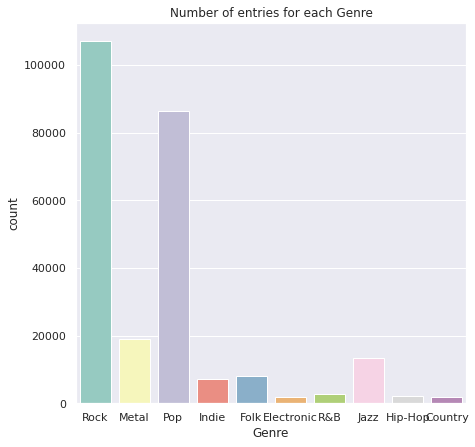

In [ ]:
# Genre vs Frequency
sns.countplot(x='Genre', data=train, palette='Set3')
plt.title("Number of entries for each Genre")
plt.show()

In [ ]:
# Lets calculate the percentage of each of the Genres.

(train['Genre'].value_counts()/train['Genre'].count()*100).sort_values(ascending=False)

Rock          42.824254
Pop           34.492020
Metal          7.647174
Jazz           5.321407
Folk           3.265027
Indie          2.893720
R&B            1.105129
Hip-Hop        0.894495
Electronic     0.801369
Country        0.755405
Name: Genre, dtype: float64

As we can see, the Rock and the Pop Genre consits of about 77% of the entire data, as a result the data set is highy imbalanced. Therefore any training on this dataset will be biased toward Rock and Pop genre, as a result of that we need to treat this dataset and make it somehow more balanced.

In [ ]:
"""
We want to calculate the median value of frequencies for the Genre. Since, Folk and Indie are the 
5th and 6th value when we meausre the frequency of the Genre, so the average of these two will be
the median value.
"""
print("The median Frequency of the Genre: ", round((train[(train['Genre']=='Folk')].count() + train[(train['Genre']=='Indie')].count())/2,0))

The median Frequency of the Genre:  Genre     7704.0
Lyrics    7704.0
dtype: float64


To make it random, we will calculate a random value for each the Genre around the median values;
Median $\pm{1000}$ and then we have choosed different number entries for all the Genre that has values more than the median values, i.e. for Rock, Pop, Metal, Jazz and Folks. 

In [ ]:
random.seed(1)

n = random.randint(6704, 8704)
print(n)
df_rock = train[(train['Genre'] =='Rock')]
df_rock = df_rock.sample(n)
#df_rock.head()

6979


In [ ]:
random.seed(2)

n = random.randint(6704, 8704)
print(n)

df_pop = train[(train['Genre'] =='Pop')]
df_pop = df_pop.sample(n)

8661


In [ ]:
random.seed(3)

n = random.randint(6704, 8704)
print(n)

df_metal = train[(train['Genre'] =='Metal')]
df_metal = df_metal.sample(n)

7191


In [ ]:
random.seed(4)

n = random.randint(6704, 8704)
print(n)

df_jazz = train[(train['Genre'] =='Jazz')]
df_jazz = df_jazz.sample(n)

7187


In [ ]:
random.seed(5)

n = random.randint(6704, 8704)
print(n)


df_folk = train[(train['Genre'] =='Folk')]
df_folk = df_folk.sample(n)

7979


In [ ]:
# We have taken out all the values for Indie, R&B, Hip-Hop, Elctronic and Country
df_rest = train[(train['Genre'] =='Indie') | (train['Genre'] =='R&B') | (train['Genre'] =='Hip-Hop') | (train['Genre'] =='Electronic') | (train['Genre'] =='Country')]

In [ ]:
# Finally merge all of the different Genre together to create a single dataframe with random entries.
frames = [df_rock, df_pop, df_metal, df_jazz,df_folk, df_rest ]

train = pd.concat(frames)

In [ ]:
# No of entries in absolute values
train['Genre'].value_counts().sort_values(ascending=False)

Pop           8661
Folk          7979
Indie         7240
Metal         7191
Jazz          7187
Rock          6979
R&B           2765
Hip-Hop       2238
Electronic    2005
Country       1890
Name: Genre, dtype: int64

In [ ]:
# No of entries in terms of percentage.
(train['Genre'].value_counts()/train['Genre'].count()*100).sort_values(ascending=False)

Pop           15.998892
Folk          14.739078
Indie         13.373972
Metal         13.283458
Jazz          13.276069
Rock          12.891844
R&B            5.107601
Hip-Hop        4.134109
Electronic     3.703704
Country        3.491272
Name: Genre, dtype: float64

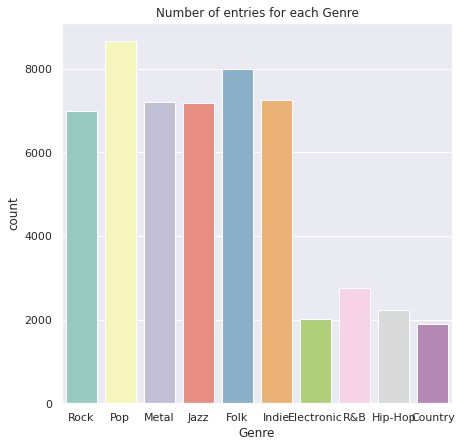

In [ ]:
sns.countplot(x='Genre', data=train, palette='Set3')
plt.title("Number of entries for each Genre")
plt.show()

Now, we can say the training dataset much more balanced therefore, the training will not be biased for any particular Genre. 

In [ ]:
train1 = train.copy()

In [ ]:
train1.reset_index(inplace=True)

In [ ]:
train1['Lyrics_length'] = train1['Lyrics'].apply(lambda x: len(x))

In [ ]:
train1.head()

,index,Genre,Lyrics,Lyrics_length
0,59422,Rock,Show me to the end of the night\nShow me to th...,679
1,16974,Rock,(Burt Bacharach/Hal David)\nI just don't know ...,784
2,275668,Rock,"All other ground is sinking sand, A doubting m...",946
3,14095,Rock,Taking it all the right way\nKeeping it in the...,1955
4,191245,Rock,"Hey now, young mothers\nHow shall we raise our...",760


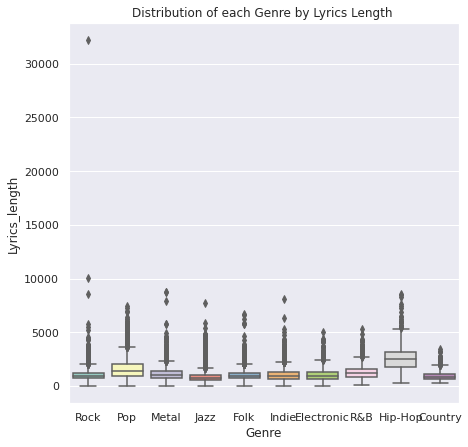

In [ ]:
sns.boxplot(y='Lyrics_length', x='Genre', data=train1, palette="Set3")
plt.title("Distribution of each Genre by Lyrics Length ")
plt.show()

In [ ]:
# Index where Lyrics the is longest
#idx = train1["Lyrics"].apply(len).idxmax()

# Get that row
#train1.iloc[idx, :]

In [ ]:
#train1 = train1.drop(labels=2158, axis=0)

In [ ]:
#sns.boxplot(y='Lyrics_length', x='Genre', data=train1, palette="Set3")
#plt.show()

In [ ]:
train1['Lyrics_length'].describe()

count    54135.000000
mean      1177.696352
std        736.731131
min          7.000000
25%        701.000000
50%       1005.000000
75%       1423.000000
max      32191.000000
Name: Lyrics_length, dtype: float64

In [ ]:
train1.head()

,index,Genre,Lyrics,Lyrics_length
0,59422,Rock,Show me to the end of the night\nShow me to th...,679
1,16974,Rock,(Burt Bacharach/Hal David)\nI just don't know ...,784
2,275668,Rock,"All other ground is sinking sand, A doubting m...",946
3,14095,Rock,Taking it all the right way\nKeeping it in the...,1955
4,191245,Rock,"Hey now, young mothers\nHow shall we raise our...",760


In [ ]:
train = train1.drop(['index','Lyrics_length'] , axis=1)

In [ ]:
train.head()

,Genre,Lyrics
0,Rock,Show me to the end of the night\nShow me to th...
1,Rock,(Burt Bacharach/Hal David)\nI just don't know ...
2,Rock,"All other ground is sinking sand, A doubting m..."
3,Rock,Taking it all the right way\nKeeping it in the...
4,Rock,"Hey now, young mothers\nHow shall we raise our..."


In [ ]:
#train.to_csv('./modified_train.csv', index = False)

In [ ]:
# Reading the modifed Training data 
#url= './modified_train.csv'


#train = pd.read_csv(url, sep=',')

In [ ]:
#train = train1.copy()

In [ ]:
#Statistical Analysis of the dataset
train.describe().transpose()

,count,unique,top,freq
Genre,54135,10,Pop,8661
Lyrics,54135,50397,"My heart is sad and lonely\nFor you I sigh, fo...",44


In [ ]:
train.isna().sum()

Genre     0
Lyrics    0
dtype: int64

In [ ]:
train.shape

(54135, 2)

In [ ]:
# Unique values of Genre column
print(train.Genre.unique())

# Number records for each of the Genre
train.groupby(['Genre']).count().sort_values(['Genre'])


['Rock' 'Pop' 'Metal' 'Jazz' 'Folk' 'Indie' 'Electronic' 'R&B' 'Hip-Hop'
 'Country']


,Lyrics
Genre,
Country,1890
Electronic,2005
Folk,7979
Hip-Hop,2238
Indie,7240
Jazz,7187
Metal,7191
Pop,8661
R&B,2765


In [ ]:
# Finding NaN values for Genre column
print(train.Genre.isna().sum())


# Finding Null values for Genre column
print(train.Genre.isnull().sum())

print((train.Genre.isna().sum() / (train.Genre.count() + train.Genre.isna().sum()))*100)

0
0
0.0


As we can see there is no null values are there in the training data, we do not need any imputation for this column. 

### **EDA with Training Data**
The dataset contains songs in over 30 languages however English is by far the most popular with 86% of songs in the English language. The next closest is Portuguese with 10% of the songs in this language. The dataset is heavily influenced by one language so for this reason we will remove all except the English language. The training dataset consists of songs in the English language as well as the genre and lyrics associated with those entries. 
The dataset has multiple genres pertaining to the songs. Rock and Pop are the top 2 genres making up nearly ~77% of the songs. The dataset is highly influenced by these two genres, in total the dataset has 10 genres. 

To combat this imbalance, we will calculate the median value frequency for the genres. Folk and Indie are 5th and 6th when measuring the frequency of the genre and the average of these two values is 7704. To make it random we will calculate a random value for each genre that has a value greater than the median value (median: +/- 1000). Next is to create a new dataset containing the random value for 5 genres (Rock, Pop, Metal, Jazz & Folk) together with the remaining genres whose frequency value was less than the median. The revised dataset has a more balanced contingent of genres and will eliminate bias from the outcomes. 

Next, we want to look at the lyrics for the dataset. Each instance contains lyrics from the song which help describe the genre. The models built in this project will use the lyrics to predict the genre. The average number of characteristics for the lyrics is 1175. 
The training dataset now consists of lyrics and the genre for each instance. The models will train on this data and the aim is to build a model capable of predicting the genre based on a given lyric. Statistical analysis carried out on the Training dataset returns no null values. 

### **Conversion of Genre Column**
The genre column currently consists of text values that we want to convert to a numeric data type. Numeric values make it easier to process when building models. So we can perform algebra later. Each genre is assigned a number in the range of 0 to 9 respectively. 
mapping = {'Rock':0, 'Metal':1, 'Pop':2, 'Indie':3, 'Folk':4, 'Electronic':5, 'R&B':6, 'Jazz':7, 'Hip-Hop':8, 'Country':9}
train.Genre = train.Genre.map(mapping)




#### ***Conversion of Genre Column.***
Since, Genre column consists of text values such as 'Rock', 'Metal' etc, we convert them into numerical values from 0 to 9. 

In [ ]:
mapping = {'Rock':0, 'Metal':1, 'Pop':2, 'Indie':3, 'Folk':4, 'Electronic':5, 'R&B':6, 'Jazz':7, 'Hip-Hop':8, 'Country':9}
train.Genre = train.Genre.map(mapping)

In [ ]:
# Finding NaN values for Genre column
print(train.Genre.isna().sum())


# Finding Null values for Genre column
print(train.Genre.isnull().sum())

print((train.Genre.isna().sum() / (train.Genre.count() + train.Genre.isna().sum()))*100)

0
0
0.0


We can see there is no null values even after conversion so, no treatment for null values are required this column.

In [ ]:
# Unique values of Genre column
print(train.Genre.unique())

# Number records for each of the Genre
train.groupby(['Genre']).count()

[0 2 1 7 4 3 5 6 8 9]


,Lyrics
Genre,
0,6979
1,7191
2,8661
3,7240
4,7979
5,2005
6,2765
7,7187
8,2238


In [ ]:
train.shape

(54135, 2)

In [ ]:
# here you get 80 % of the rows
train = train.sample(frac = 1.0, random_state=1)

In [ ]:
train.shape

(54135, 2)

### **Preprocessing of Lyrics Column**

The lyrics column consists of text data which has, alphabetic, non-alphabetic, punctuation etc. Through the pre-processing steps we will try to clean the data as much as possible so that at the time training the algorithm makes more accurate prediction. 

Pre-process is a common operation in NLP, punctuations, stopwords (which does not add much meaning to a sentence) are needed to be removed from the corpus. The lyrics column contains text in upper/lower case, punctuation, non-alphabetic. For models to be able to process this there are a number of preprocessing steps we must implement to make the content readable to the models. 

In [ ]:
train.Lyrics

8414     Dance like yo daddy\nDance like yo daddy\nDa-D...
41024    Some people think he's good looking\nOther peo...
37695    Do you remember that song by Janis Ian?\nThe o...
27342    In this life we go through lots of hard times ...
7496     How sweet it is\nTo be loved by you\nHow sweet...
                               ...                        
50057    [half a mill] Take it to the streets, snakes w...
32511    The family tree was chainsawed wednesday week\...
5192     Leading everything along, never far from being...
12172    Don't worry about a thing\nCause every little ...
33003    So you're finally over it now.\nYou thought yo...
Name: Lyrics, Length: 54135, dtype: object

 **Removal of punctions**

The function remove_punct will remove the punctuation from the lyrics column. In-text processing the special characters such as “!”,  “&” and “@” can cause duplicates in the text when part of a string. Removing these characters reduces the noise in the dataset. The same is done for digits.

In [ ]:
#import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Removing all the special characters from the dataset

#Defining the function
def remove_punct(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

# Removing special characters
train["Lyrics"] = train.Lyrics.map(remove_punct)

print("All special characters are removed!")

All special characters are removed!


In [ ]:
train.Lyrics

8414     Dance like yo daddy\nDance like yo daddy\nDaDa...
41024    Some people think hes good looking\nOther peop...
37695    Do you remember that song by Janis Ian\nThe on...
27342    In this life we go through lots of hard times ...
7496     How sweet it is\nTo be loved by you\nHow sweet...
                               ...                        
50057    half a mill Take it to the streets snakes with...
32511    The family tree was chainsawed wednesday week\...
5192     Leading everything along never far from being ...
12172    Dont worry about a thing\nCause every little t...
33003    So youre finally over it now\nYou thought you ...
Name: Lyrics, Length: 54135, dtype: object

**Removing Digits**
In this step we will remove any digits from the word as the digits does not make any sense in the Enlgish language.


In [ ]:
#from string import digits
  
def remove_number(text):
  translator = str.maketrans('', '', digits)
  return text.translate(translator)

train['Lyrics'] = train.Lyrics.map(remove_number)

print("All digits are removed!")

All digits are removed!


In [ ]:
train.Lyrics

8414     Dance like yo daddy\nDance like yo daddy\nDaDa...
41024    Some people think hes good looking\nOther peop...
37695    Do you remember that song by Janis Ian\nThe on...
27342    In this life we go through lots of hard times ...
7496     How sweet it is\nTo be loved by you\nHow sweet...
                               ...                        
50057    half a mill Take it to the streets snakes with...
32511    The family tree was chainsawed wednesday week\...
5192     Leading everything along never far from being ...
12172    Dont worry about a thing\nCause every little t...
33003    So youre finally over it now\nYou thought you ...
Name: Lyrics, Length: 54135, dtype: object

**Removing Stop-words**

Stop Words: The stop words are those words that are commonly used such as “the”, “a”, “an”, “in”. As a result these words do not hold any particular while doing the NLP, therefore they removed at the stage of pre-processing. Here, we will use NLTK library to identify the stop words for English language and remove them form the corpus. 

In [ ]:
# Removing the stop words from the dataset
# Creating the list of StopWords in the English language
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords

sw = set(stopwords.words('english'))
#Defining the function
def remove_english_stopword(txt):
  wosw =[]
  for word in txt.split():
    if word.lower() not in sw:
      wosw.append(word.lower())
  return " ".join(wosw)

#Removing the stop Words
train['Lyrics'] = train.Lyrics.map(remove_english_stopword)

print("Stopwords are removed!!")

Stopwords are removed!!


**Lemmatization**

Lemmatization is a process of reducing the inflected words, ensuring that the root words belongs to the language. Since, lemmatization retuns the actual word of the language, it is more useful the Stemming. Since, we are using lemmatization, we will not use Stemming further. 

Here, we will WordNet lemmatizer from NLTK library.

In [ ]:
# Lemmatization of words
#import nltk
#nltk.download('punkt')
#nltk.download('wordnet')
#from nltk.stem import WordNetLemmatizer
#from nltk.tokenize import sent_tokenize, word_tokenize


def lemmaSentence(sentence):
  wordnet_lemmatizer = WordNetLemmatizer()
  token_words=word_tokenize(sentence)
  lemma_sentence=[]
  for word in token_words:
    lemma_sentence.append(wordnet_lemmatizer.lemmatize(word))
    lemma_sentence.append(" ")
  return "".join(lemma_sentence)


train['Lyrics'] = train.Lyrics.map(lemmaSentence)

print("Words are Lemmatized!!")

Words are Lemmatized!!


In [ ]:
train.Lyrics

8414     dance like yo daddy dance like yo daddy dadanc...
41024    people think he good looking people think he p...
37695    remember song janis ian one complains getting ...
27342    life go lot hard time say know day bring learn...
7496     sweet loved sweet loved needed shelter someone...
                               ...                        
50057    half mill take street snake heat game wan na p...
32511    family tree chainsawed wednesday week mingle m...
5192     leading everything along never far wrong never...
12172    dont worry thing cause every little thing gon ...
33003    youre finally thought wouldnt make knew would ...
Name: Lyrics, Length: 54135, dtype: object

In [ ]:
train.head()

,Genre,Lyrics
8414,2,dance like yo daddy dance like yo daddy dadanc...
41024,3,people think he good looking people think he p...
37695,4,remember song janis ian one complains getting ...
27342,7,life go lot hard time say know day bring learn...
7496,2,sweet loved sweet loved needed shelter someone...


In [ ]:
text = " ".join(w for w in train.Lyrics)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 38870515 words in the combination of all review.


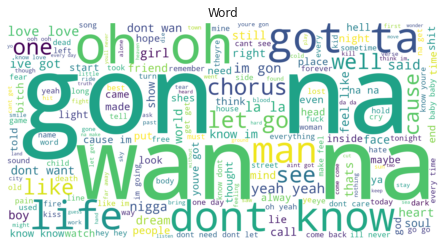

In [ ]:
wordcloud = WordCloud(width = 2000, height = 1000,
                background_color ='white',
                stopwords = sw, 
                min_font_size = 5).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word")
plt.show()

**Counting the Words**
Next, we want to count the occurance of each word in the corpus, this pre-step of Tokenization. 

In [ ]:
#from collections import Counter
# Count unique words
def count_word(text):
    count = Counter()
    for txt in text.values:
        for w in txt.split():
            count[w] += 1
    return count

count = count_word(train.Lyrics)

In this step we are showing 10 most frequent words.

In [ ]:
# Top 10 most frequent words
count.most_common(10)

[('im', 109433),
 ('love', 83781),
 ('know', 76431),
 ('dont', 76292),
 ('like', 71326),
 ('got', 60530),
 ('get', 52312),
 ('oh', 51910),
 ('go', 49630),
 ('na', 47742)]

In [ ]:
no_of_words = len(count)
print(no_of_words)

93352


Here, we can see total number of unique words presents for the Lyrics. And as we can see some of the words are used for few thousand times and few are only used for once and twice, and those are used only few times doesn't carry same weightage. So we want to keep those words that are used fives or more. We know, this is not the best approach but with our limited computational capacity we need to take some drastic measure to reduce the number of words.

In [ ]:
min_occurance = 5

count = [k for k, c in count.items() if c >= min_occurance ]

no_of_words = len(count)
print(no_of_words)

27599


In [ ]:
train

,Genre,Lyrics
8414,2,dance like yo daddy dance like yo daddy dadanc...
41024,3,people think he good looking people think he p...
37695,4,remember song janis ian one complains getting ...
27342,7,life go lot hard time say know day bring learn...
7496,2,sweet loved sweet loved needed shelter someone...
...,...,...
50057,8,half mill take street snake heat game wan na p...
32511,4,family tree chainsawed wednesday week mingle m...
5192,0,leading everything along never far wrong never...
12172,2,dont worry thing cause every little thing gon ...


In [ ]:
train.shape

(54135, 2)

***Now, we have saved the preprocess data.***

In [ ]:
#train.to_csv('/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/preprocessed_train.csv', index = False)

In [ ]:
# Reading Training data
#url= '/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/preprocessed_train.csv'


#train = pd.read_csv(url, sep=',')

#### ***Train and Validation Data***
Next, we divide the dataset into training and validation with an 80-20 split respectively. This will allow us to estimate the performance of the dataset before final deployment.  

In [ ]:
from sklearn.model_selection import train_test_split

data, label = train.Lyrics, train.Genre
# split again, and we should see the same split
lyrics_train, lyrics_valid, genre_train, genre_valid = train_test_split(data, label, test_size=0.2, random_state=1)

In [ ]:
lyrics_train.shape, genre_train.shape

((43308,), (43308,))

In [ ]:
lyrics_valid.shape, genre_valid.shape

((10827,), (10827,))

In [ ]:
no_of_words = len(count)
print(no_of_words)

27599


As we have talked before, not all words in the corpus contribute to label prediction. We can optimize our learning process by discarding rare or irrelevant words from our vocabulary. The study shows that using the most frequent 20,000 features is generally sufficient.

Let's complete the following steps:


1.   Tokenizes the texts into words
2.   Creates a vocabulary using the top 20,000 tokens
3.   Converts the tokens into sequence vectors
4.   Pads the sequences to a fixed sequence length

In [ ]:
# Finding NaN values for Genre column
print(train.Lyrics.isna().sum())


# Finding Null values for Genre column
print(train.Lyrics.isnull().sum())

0
0


**Tokenization:**

Tokenization is a process of taking a word and representing it as a token. A token is an instance of a sequence of characters that are grouped together as a useful semantic unit for processing. These tokens are then converted into a sequence of vectors using Tokenizer from preprocessing. Once vectorized we can perform computation on the word representations. The count of words was stored in the variable count from the previous section and now is tokenized. 
Since, all the lyrics (document) are not the same in length, we need to put zeros for the shorter length lyrics and create the same length lyrics, this process of adding zeros is called padding. In Keras, we can add these zeros either at the beginning (pre) of the lyrics or at the end (post) of the sentence. Here, we have chosen the ‘post’ method to add these zeros.


In [ ]:
train.Lyrics=train.Lyrics.astype(str)

# Tokenizer API
from tensorflow.keras.preprocessing.text import Tokenizer

# Vectorization parameters
# Limit on the number of features. We use the top 20K features.
#TOP_N = 22790

TOP_N = no_of_words

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=TOP_N)
tokenizer.fit_on_texts(lyrics_train) # fit only to training

In [ ]:
wordindex = tokenizer.word_index
print('%s unique tokens are found' % len(wordindex))

82432 unique tokens are found


In [ ]:
vocab_size1 = len(tokenizer.word_index)+1
print("Vocab Size: ", vocab_size1)

Vocab Size:  82433


In [ ]:
lyrics_train_seq = tokenizer.texts_to_sequences(lyrics_train)
lyrics_valid_seq = tokenizer.texts_to_sequences(lyrics_valid)

In [ ]:
print(lyrics_train[9:10])
print(lyrics_train_seq[9:10])

39928    secret cavern underneath west covina half desp...
Name: Lyrics, dtype: object
[[488, 9725, 1111, 903, 540, 2173, 427, 2622, 17516, 176, 5140, 6806, 136, 1334, 3071, 1334, 379, 101, 15494, 54, 575, 3911, 266, 8, 1508, 27, 1066, 15495, 312, 616, 20243, 468, 2286, 2239, 1, 3302, 1, 3302, 1, 3302, 1, 3302, 1, 3302, 1, 3302, 1, 286, 3302, 1, 3302, 1492, 1276, 5244, 2398, 353, 153, 579, 412, 344, 2185, 2766, 56, 103, 56, 2811, 1334, 379, 3303, 1189, 872, 391, 843, 342, 572, 562, 52, 548, 1117, 11151, 1335, 4244, 708, 1, 3302, 1, 3302, 1, 3302, 1, 3302, 1, 3302, 1, 3302, 1, 286, 3302, 1, 3302]]


In [ ]:
print(lyrics_valid[9:10])
print(lyrics_valid_seq[9:10])

26920    need love badly love oh madly dont stand ghost...
Name: Lyrics, dtype: object
[[35, 2, 3871, 2, 7, 4680, 4, 179, 654, 293, 125, 107, 106, 186, 334, 2014, 4, 179, 654, 293, 369, 1033, 1147, 185, 150, 198, 2685, 1, 334, 513, 106, 143, 161, 56, 4915, 3, 167, 622]]


In [ ]:
len(max(lyrics_train, key=len))

9398

In [ ]:
MAX_SEQUENCE_LENGTH = 1000

# Get max sequence length.
max_length = len(max(lyrics_train, key=len))
if max_length > MAX_SEQUENCE_LENGTH:
  max_length = MAX_SEQUENCE_LENGTH

print(max_length)

1000


In [ ]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

lyrics_train_padded = pad_sequences(lyrics_train_seq, maxlen=max_length, padding="post", truncating="post")
lyrics_valid_padded = pad_sequences(lyrics_valid_seq, maxlen=max_length, padding="post", truncating="post")


In [ ]:
lyrics_train_padded.shape, lyrics_valid_padded.shape

((43308, 1000), (10827, 1000))

In [ ]:
lyrics_train_padded[9:10]

array([[  488,  9725,  1111,   903,   540,  2173,   427,  2622, 17516,
          176,  5140,  6806,   136,  1334,  3071,  1334,   379,   101,
        15494,    54,   575,  3911,   266,     8,  1508,    27,  1066,
        15495,   312,   616, 20243,   468,  2286,  2239,     1,  3302,
            1,  3302,     1,  3302,     1,  3302,     1,  3302,     1,
         3302,     1,   286,  3302,     1,  3302,  1492,  1276,  5244,
         2398,   353,   153,   579,   412,   344,  2185,  2766,    56,
          103,    56,  2811,  1334,   379,  3303,  1189,   872,   391,
          843,   342,   572,   562,    52,   548,  1117, 11151,  1335,
         4244,   708,     1,  3302,     1,  3302,     1,  3302,     1,
         3302,     1,  3302,     1,  3302,     1,   286,  3302,     1,
         3302,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [ ]:
print(lyrics_train[9:10])
print(lyrics_train_seq[9:10])
print(lyrics_train_padded[9:10])

39928    secret cavern underneath west covina half desp...
Name: Lyrics, dtype: object
[[488, 9725, 1111, 903, 540, 2173, 427, 2622, 17516, 176, 5140, 6806, 136, 1334, 3071, 1334, 379, 101, 15494, 54, 575, 3911, 266, 8, 1508, 27, 1066, 15495, 312, 616, 20243, 468, 2286, 2239, 1, 3302, 1, 3302, 1, 3302, 1, 3302, 1, 3302, 1, 3302, 1, 286, 3302, 1, 3302, 1492, 1276, 5244, 2398, 353, 153, 579, 412, 344, 2185, 2766, 56, 103, 56, 2811, 1334, 379, 3303, 1189, 872, 391, 843, 342, 572, 562, 52, 548, 1117, 11151, 1335, 4244, 708, 1, 3302, 1, 3302, 1, 3302, 1, 3302, 1, 3302, 1, 3302, 1, 286, 3302, 1, 3302]]
[[  488  9725  1111   903   540  2173   427  2622 17516   176  5140  6806
    136  1334  3071  1334   379   101 15494    54   575  3911   266     8
   1508    27  1066 15495   312   616 20243   468  2286  2239     1  3302
      1  3302     1  3302     1  3302     1  3302     1  3302     1   286
   3302     1  3302  1492  1276  5244  2398   353   153   579   412   344
   2185  2766    56   103 

In [ ]:
print(lyrics_valid[9:10])
print(lyrics_valid_seq[9:10])
print(lyrics_valid_padded[9:10])

26920    need love badly love oh madly dont stand ghost...
Name: Lyrics, dtype: object
[[35, 2, 3871, 2, 7, 4680, 4, 179, 654, 293, 125, 107, 106, 186, 334, 2014, 4, 179, 654, 293, 369, 1033, 1147, 185, 150, 198, 2685, 1, 334, 513, 106, 143, 161, 56, 4915, 3, 167, 622]]
[[  35    2 3871    2    7 4680    4  179  654  293  125  107  106  186
   334 2014    4  179  654  293  369 1033 1147  185  150  198 2685    1
   334  513  106  143  161   56 4915    3  167  622    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0   

In [ ]:
print(genre_train[:3])
print(genre_valid[:3])

21795    1
4144     0
19766    1
Name: Genre, dtype: int64
48970    6
46350    9
48212    9
Name: Genre, dtype: int64


In [ ]:
lyrics_train_padded.shape[1]

1000



---



#### ***The Test Data***

In [ ]:
# Reading Test data
url1= '/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/test.csv'


test = pd.read_csv(url1, sep=',')


# First 5 rows of the dataset
test.head()

,Song,Song year,Artist,Genre,Lyrics,Track_id
0,craftsmanship,2005,buck-65,Hip-Hop,Most folks spend their days daydreaming of fin...,8294
1,come-on-out,2012,the-elwins,Indie,Take your cold hands and put them on my face\n...,21621
2,riot,2013,bullet-for-my-valentine,Metal,Are you ready it's time for war\nWe'll break d...,3301
3,that-s-what-girls-do,2007,dream-street,Pop,You ask me why I change the color of my hair\n...,2773
4,believe-in-a-dollar,2012,cassidy,Hip-Hop,Do you believe in magic in a young girl's hear...,16797


In [ ]:
# Removed all columns except Lyrics and Genre
test = test[['Genre', 'Lyrics']]

test.head()

,Genre,Lyrics
0,Hip-Hop,Most folks spend their days daydreaming of fin...
1,Indie,Take your cold hands and put them on my face\n...
2,Metal,Are you ready it's time for war\nWe'll break d...
3,Pop,You ask me why I change the color of my hair\n...
4,Hip-Hop,Do you believe in magic in a young girl's hear...


As we are only interested about the Lyrics and corresponding Genre, so we just keep only columns and removed rests.

In [ ]:
test['Genre'].value_counts().sort_values(ascending=False)

Rock          1410
Pop           1110
Hip-Hop        960
Metal          810
Country        810
Electronic     660
Jazz           660
Indie          510
R&B            510
Folk           495
Name: Genre, dtype: int64

In [ ]:
# Assigning Genre with a number
mapping = {'Rock':0, 'Metal':1, 'Pop':2, 'Indie':3, 'Folk':4, 'Electronic':5, 'R&B':6, 'Jazz':7, 'Hip-Hop':8, 'Country':9}

test.Genre = test.Genre.map(mapping)

As we can see that the Genre column is text, to use it for prediction we need to convert it to numeric column and he have convert it in the same way we treated the training data.

In [ ]:
# Finding NaN values for Genre column
print(test.Genre.isna().sum())


# Finding Null values for Genre column
print(test.Genre.isnull().sum())

print((test.Genre.isna().sum() / (test.Genre.count() + test.Genre.isna().sum()))*100)

0
0
0.0


We do not have null values, so no imputaion is required.

*We need to treat the test the same way as we have done with the training data. So, we have removed any special character and Digits and then we have removed any stopwords of English language and finally lemmatized the Lyrics columns.*

In [ ]:
# Removing special characters
test["Lyrics"] = test.Lyrics.map(remove_punct)
print("Special Characters are removed!")

Special Characters are removed!


In [ ]:
# Removing of Digits
test['Lyrics'] = test.Lyrics.map(remove_number)
print("Digits are removed!")

Digits are removed!


In [ ]:
#Removing the stop Words
test['Lyrics'] = test.Lyrics.map(remove_english_stopword)
print("Stop words are removed!!")

Stop words are removed!!


In [ ]:
# Lemmatization of words
test['Lyrics'] = test.Lyrics.map(lemmaSentence)
print("Words are Lemmatized!!")

Words are Lemmatized!!


In [ ]:
# Counting the number of differnt words.
count1 = count_word(test.Lyrics)
print(len(count))
# Top 10 most frequent words
count1.most_common(10)

27599


[('im', 16718),
 ('love', 11886),
 ('like', 11128),
 ('dont', 11088),
 ('know', 11086),
 ('got', 9004),
 ('get', 8024),
 ('oh', 7574),
 ('go', 7212),
 ('time', 7059)]

In [ ]:
# Total no of words that are used alteast twice
min_occurance = 2

count1 = [k for k, c in count1.items() if c >= min_occurance ]

no_of_words1 = len(count1)
print(no_of_words1)

20361


In [ ]:
# We want to test data for Lyrics and Genre
from sklearn.model_selection import train_test_split

data, label = test.Lyrics, test.Genre
# split again, and we should see the same split
lyrics_test, lyrics_v, Genre_test, Genre_v = train_test_split(data, label, test_size=1, random_state=20)

In [ ]:
lyrics_test.shape, lyrics_v.shape

((7934,), (1,))

In [ ]:
Genre_test.shape, Genre_v.shape

((7934,), (1,))

In [ ]:
lyrics_test

5915    oh hurt like child birth wound heal slow dont ...
766     know name bitch uhh yeah hold street gave heat...
4818    im sleeping billion dollar coka im eatin im ea...
4834    course ima stunt course ima stunt course ima s...
4835    intro ha say who scientific cf mafia thats cre...
                              ...                        
7068    ooooh come back proud canadian tv hockey night...
7391    az g girl like gangsta g girl like gangsta fit...
4367    wonder filter trip pas time ask hell tell noth...
2522    id rather blue thinking id rather blue happy s...
7523    im king im leader im like paul lot like peter ...
Name: Lyrics, Length: 7934, dtype: object

In [ ]:
Genre_test

5915    6
766     8
4818    8
4834    8
4835    8
       ..
7068    4
7391    2
4367    0
2522    2
7523    0
Name: Genre, Length: 7934, dtype: int64

In [ ]:
# Tokenizer API
from tensorflow.keras.preprocessing.text import Tokenizer

# Vectorization parameters
# Limit on the number of features. We use the top 20K features.
TOPN = no_of_words1


# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=TOPN)
tokenizer.fit_on_texts(lyrics_test) 

In [ ]:
vocab_size2 = len(tokenizer.word_index) +1
print("Size of the vocabulary: ", vocab_size2)

Size of the vocabulary:  38619


In [ ]:
lyrics_test_seq = tokenizer.texts_to_sequences(lyrics_test)


In [ ]:
print(lyrics_test[:1])
print(lyrics_test_seq[:1])

5915    oh hurt like child birth wound heal slow dont ...
Name: Lyrics, dtype: object
[[8, 253, 3, 234, 1572, 1141, 1319, 373, 4, 5, 10, 4, 5, 22, 548, 29, 29, 54, 32, 924, 202, 143, 3, 35, 1, 452, 111, 110, 103, 244, 52, 54, 13, 308, 4, 117, 158, 10, 1312, 3, 4085, 12488, 132, 819, 2963, 132, 2907, 12, 44, 279, 4, 626, 6788, 448, 192, 109, 449, 3163, 2755, 2963, 8635, 1284, 1275, 432, 321, 1177, 4086, 1, 1047, 126, 37, 4, 49, 334, 79, 79, 48, 31, 11, 7, 80, 1037, 10, 109, 68, 79, 79, 117, 7, 80, 2477, 327, 44, 138, 1197, 960, 39, 85, 53, 11, 1345, 128, 38, 182, 200, 12, 2076, 218, 26, 681, 51, 4922, 261, 291, 282, 23, 116, 225, 38, 85, 1728, 111, 45, 286, 1432, 141, 823, 34, 8636, 54, 6, 2, 268, 103, 1120, 100, 448, 19, 230, 2908, 47, 6789, 2852, 272, 6, 6, 292, 77, 116, 21, 34, 5114, 1, 768, 1401, 657, 10725, 32, 276, 393, 55, 63, 1402, 1976, 788, 234, 1770, 341, 4, 55, 817, 648, 141, 477, 113, 4706, 671, 936, 1276, 1313, 676, 453, 5, 1591, 16, 133, 4, 49, 334, 79, 79, 48, 31, 11, 7,

In [ ]:
max_length1 = len(max(lyrics_train, key=len))
print(max_length1)

9398


In [ ]:
MAX_SEQUENCE_LENGTH1 = 1000

# Get max sequence length.
max_length1 = len(max(lyrics_train, key=len))
if max_length1 > MAX_SEQUENCE_LENGTH1:
  max_length1 = MAX_SEQUENCE_LENGTH1

print(max_length1)

1000


In [ ]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

lyrics_test_padded = pad_sequences(lyrics_test_seq, maxlen=max_length1, padding="post", truncating="post")

In [ ]:
print(lyrics_test[:1])
print(lyrics_test_seq[0])
print(lyrics_test_padded[0])

5915    oh hurt like child birth wound heal slow dont ...
Name: Lyrics, dtype: object
[8, 253, 3, 234, 1572, 1141, 1319, 373, 4, 5, 10, 4, 5, 22, 548, 29, 29, 54, 32, 924, 202, 143, 3, 35, 1, 452, 111, 110, 103, 244, 52, 54, 13, 308, 4, 117, 158, 10, 1312, 3, 4085, 12488, 132, 819, 2963, 132, 2907, 12, 44, 279, 4, 626, 6788, 448, 192, 109, 449, 3163, 2755, 2963, 8635, 1284, 1275, 432, 321, 1177, 4086, 1, 1047, 126, 37, 4, 49, 334, 79, 79, 48, 31, 11, 7, 80, 1037, 10, 109, 68, 79, 79, 117, 7, 80, 2477, 327, 44, 138, 1197, 960, 39, 85, 53, 11, 1345, 128, 38, 182, 200, 12, 2076, 218, 26, 681, 51, 4922, 261, 291, 282, 23, 116, 225, 38, 85, 1728, 111, 45, 286, 1432, 141, 823, 34, 8636, 54, 6, 2, 268, 103, 1120, 100, 448, 19, 230, 2908, 47, 6789, 2852, 272, 6, 6, 292, 77, 116, 21, 34, 5114, 1, 768, 1401, 657, 10725, 32, 276, 393, 55, 63, 1402, 1976, 788, 234, 1770, 341, 4, 55, 817, 648, 141, 477, 113, 4706, 671, 936, 1276, 1313, 676, 453, 5, 1591, 16, 133, 4, 49, 334, 79, 79, 48, 31, 11, 7, 

In [ ]:
Genre_test

5915    6
766     8
4818    8
4834    8
4835    8
       ..
7068    4
7391    2
4367    0
2522    2
7523    0
Name: Genre, Length: 7934, dtype: int64



---



## **Building a Model**
One of the project specifications is building and comparing multiple models. And in this section, we compare the performance on the classification task across a few models which are specified below. For each model, results are recorded for Training, Validation and Test data and then compare the loss and accuracy results for the same. We have built the following model for our experiment.


#### **1.1 SimpleRNN**

A sequential model is one where one input gives us one output. Fully connected layers are defined using the dense class. We specify the number of neurons in each layer and specify the activation function using the activation argument. 
The embedding layer uses TOP_N1 (Vocab Size) where we have already specified using Tokenizer API to convert each word as a unique integer. Next, we add the SimpleRNN to make use of the ReLu and Softmax activation functions. Using the softmax activation allows us to convert a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector. To overcome the vanishing gradient problem we use the ReLu activation function. 



Compiling the model - TensorFlow is an efficient numeric library that chooses the best way to represent the network for training and making predictions to run on hardware. We define the optimiser as the efficient stochastic gradient descent algorithm “Adam”. This optimizer is a good choice because it automatically tunes itself and gives good results in a wide range of problems. This is a classification problem so we will use accuracy as the metric for measuring the performance of the model. 
We use sparse categorical cross-entropy as the loss function for multi-class classification. This function is used together with softmax activation in order to predict the probability for each class. 


In [ ]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras import layers
#from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, SimpleRNN, GlobalAveragePooling1D, Conv1D, GlobalMaxPooling1D, MaxPooling1D

In [ ]:
EmbeddingDim = 50
# max_length = 500
TOP_N1 = vocab_size1
TOP_N = no_of_words
epochs = 10
batch_size = 32

In [ ]:
from keras.regularizers import l2

In [ ]:
######################################Simple RNN model#####################################################################

# 1. Define a Network
modelSimpleRNN = Sequential()

modelSimpleRNN.add(Embedding(TOP_N1, EmbeddingDim, input_length=max_length))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
modelSimpleRNN.add(SimpleRNN(64, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
modelSimpleRNN.add(Dense(32, activation='relu')) # kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu')) 
modelSimpleRNN.add(Dense(10, activation='softmax')) 

print(modelSimpleRNN.summary()) 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1000, 50)          4121650   
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 64)                7360      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 4,131,420
Trainable params: 4,131,420
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# 2. Compile Modle

optim = tf.keras.optimizers.Adam(lr=0.01) 
metrics = ["accuracy"]
loss = 'sparse_categorical_crossentropy'

modelSimpleRNN.compile(loss=loss, optimizer=optim, metrics=metrics)

In [ ]:
# Step 3: Fit Network
epochs = 5
batch_size = 32

histSimpleRNN = modelSimpleRNN.fit(lyrics_train_padded, genre_train, 
                                   epochs=epochs, 
                                   batch_size = batch_size, 
                                   validation_data=(lyrics_valid_padded, genre_valid), 
                                   verbose=1)

Epoch 1/5
 214/1354 [===>..........................] - ETA: 5:53 - loss: 2.1732 - accuracy: 0.1584

KeyboardInterrupt: ignored

In [ ]:
modelSimpleRNN.save('/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/saved_models/modelSimpleRNN.h5')

In [ ]:
#Step 4: Evaluate Network
loss, accuracy = modelSimpleRNN.evaluate(lyrics_test_padded, Genre_test)
print('Test set Loss:{:0.3f}\n Accuracy {:0.3f}'.format(loss, accuracy))

248/248 [==============================] - 13s 54ms/step - loss: 2.4466 - accuracy: 0.1399
Test set Loss:2.447
 Accuracy 0.140


Accuracy 0.140

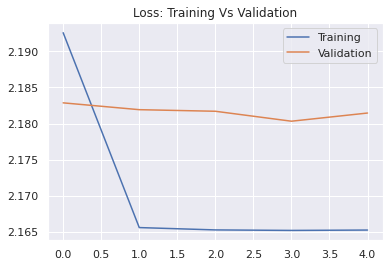

In [ ]:
plt.title('Loss: Training Vs Validation')
plt.plot(histSimpleRNN.history['loss'], label='Training')
plt.plot(histSimpleRNN.history['val_loss'], label='Validation')
plt.legend()
plt.show()

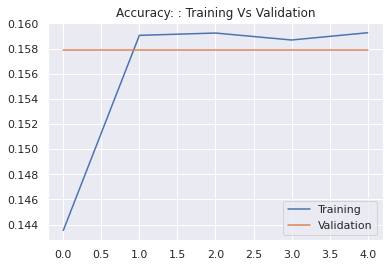

In [ ]:
plt.title('Accuracy: : Training Vs Validation')
plt.plot(histSimpleRNN.history['accuracy'], label='Training')
plt.plot(histSimpleRNN.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

**Observation:**

Although we have noticed that the accuracy is not great and before we made our dataset balanced, we had achieved the accuracy easily more than 50% and it is quite normal since 77% of data belongs to Rock or Pop, therefore the algorithm could be right by assigning Rock or Pop quite easily. That is the main reason we have made it a balance. Since we have resource constraints, we have only 5 epochs. With high epochs, we could have easily achieved high accuracy. 

Since validation accuracy is higher than training indicating a case of overfitting, the validation accuracy is constant which means there is no learning from the model. It is considered as a case of overfitting.


#### ***1.2. Simple RNN with Dropout***

Dropout is implemented per layer on the model which will reduce overfitting and improve generalization error to deliver a valid and more dependable outcome. 


We compile the network using the same previous model. 
Evaluate the model - The model returns with an accuracy of 0.14. This is a low result and the learning curves below show how the model has performed over time. The inclusion of dropout has not improved the RNN model. 


In [ ]:
######################################Simple RNN with Dropout model#####################################################################

# 1. Define a Network
modelSimpleRNNWithDropOut = Sequential()

modelSimpleRNNWithDropOut.add(Embedding(TOP_N1, EmbeddingDim, input_length=max_length))
modelSimpleRNNWithDropOut.add(Dropout(0.3)) 
modelSimpleRNNWithDropOut.add(SimpleRNN(64))
modelSimpleRNNWithDropOut.add(Dropout(0.3))
modelSimpleRNNWithDropOut.add(Dense(32, activation='relu'))
modelSimpleRNNWithDropOut.add(Dropout(0.3))
modelSimpleRNNWithDropOut.add(Dense(10, activation='softmax')) 

print(modelSimpleRNNWithDropOut.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 50)          4100000   
_________________________________________________________________
dropout (Dropout)            (None, 1000, 50)          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               22912     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
# 2. Compile Modle

optim = tf.keras.optimizers.Adam(lr=0.0001) 
metrics = ["accuracy"]
loss = 'sparse_categorical_crossentropy'

modelSimpleRNNWithDropOut.compile(loss=loss, optimizer=optim, metrics=metrics)

In [ ]:
# Step 3: Fit Network
epochs = 10
batch_size = 64
#histSimpleRNN = modelSimpleRNN.fit(lyrics_train_padded, genre_train, epochs=epochs, batch_size = batch_size, verbose=2)
histSimpleRNNWithDropOut = modelSimpleRNNWithDropOut.fit(lyrics_train_padded, genre_train, 
                                                         epochs=epochs, 
                                                         batch_size = batch_size, 
                                                         validation_data=(lyrics_valid_padded, genre_valid), 
                                                         verbose=1)

Epoch 1/10
677/677 [==============================] - 438s 644ms/step - loss: 2.2263 - accuracy: 0.1390 - val_loss: 2.1822 - val_accuracy: 0.1578
Epoch 2/10
677/677 [==============================] - 436s 645ms/step - loss: 2.1831 - accuracy: 0.1480 - val_loss: 2.1815 - val_accuracy: 0.1578
Epoch 3/10
677/677 [==============================] - 435s 643ms/step - loss: 2.1808 - accuracy: 0.1462 - val_loss: 2.1818 - val_accuracy: 0.1578
Epoch 4/10
677/677 [==============================] - 435s 643ms/step - loss: 2.1763 - accuracy: 0.1514 - val_loss: 2.1840 - val_accuracy: 0.1578
Epoch 5/10
677/677 [==============================] - 434s 641ms/step - loss: 2.1770 - accuracy: 0.1486 - val_loss: 2.1810 - val_accuracy: 0.1578
Epoch 6/10
677/677 [==============================] - 435s 643ms/step - loss: 2.1794 - accuracy: 0.1465 - val_loss: 2.1813 - val_accuracy: 0.1578
Epoch 7/10
677/677 [==============================] - 438s 648ms/step - loss: 2.1715 - accuracy: 0.1473 - val_loss: 2.1805 -

In [ ]:
modelSimpleRNNWithDropOut.save('/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/saved_models/modelSimpleRNNWithDropOut.h5')

In [ ]:
#Step 4: Evaluate Network
loss, accuracy = modelSimpleRNNWithDropOut.evaluate(lyrics_test_padded, Genre_test)
print('Test set Loss:{:0.3f}\n Accuracy {:0.3f}'.format(loss, accuracy))

248/248 [==============================] - 22s 90ms/step - loss: 2.4221 - accuracy: 0.1399
Test set Loss:2.422
 Accuracy 0.140


Accuracy 0.140

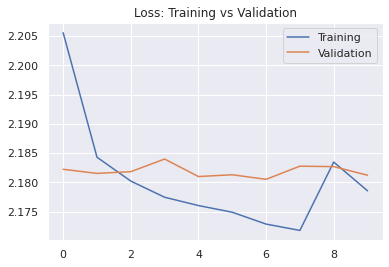

In [ ]:
plt.title('Loss: Training vs Validation')
plt.plot(histSimpleRNNWithDropOut.history['loss'], label='Training')
plt.plot(histSimpleRNNWithDropOut.history['val_loss'], label='Validation')
plt.legend()
plt.show()

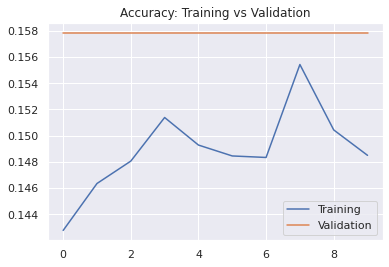

In [ ]:
plt.title('Accuracy: Training vs Validation')
plt.plot(histSimpleRNNWithDropOut.history['accuracy'], label='Training')
plt.plot(histSimpleRNNWithDropOut.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()



---



#### ***1.3. Simple LSTM***

The Long Short-Term Memory or LSTM network is a recurrent neural network that is trained using Backpropagation Through Time and overcomes the vanishing gradient problem. LSTM networks are useful when addressing difficult sequence problems in machine learning and achieve state-of-the-art results.  LSTM are ideal for recognizing long term patterns in text. 
Model Summary: LSTM for Genre classification 

Embedding Layer: Used to reduce the dimensionality of the input features by combining words with similar Euclidean distance. Similarity also depends on the context. This acts as a lookup layer between the input layer and other layers.  
LSTM Layer: LSTM layer is used units = 64, indicating the dimensionality of the output space.  
Dense Layer: Dense Layer collects/feeds data from the previous outputs and pass it to all its neurons

Parameter Settings: Batch size =64, embedding dimension = 50, No_of_epoch = 10, optimizer = Adam and the metrics used for evaluation is accuracy. Sparse_categorical_crossentropy is used to measure loss at each iteration, since it’s a binary classification problem.
Learning curves for LSTM

From the results that slight overfitting is observed. By looking into the graphs of validation and train loss it seems that the training just started memorizing instead of generalizing. Hence, dropouts are added to avoid overfitting. After each epoch, though training loss is decreasing, the validation loss is seen with more oscillations indicating fine-tuning of parameters are required. 


In [ ]:
########################################### SINGLE LAYER LSTM ############################################################

# 1. Define a Network
modelSimpleLSTM = Sequential()

modelSimpleLSTM.add(Embedding(TOP_N1, EmbeddingDim, input_length=max_length)) 
modelSimpleLSTM.add(LSTM(64)) 
modelSimpleLSTM.add(Dense(10, activation='softmax')) 

print(modelSimpleLSTM.summary()) 


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 50)          4124300   
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 4,154,390
Trainable params: 4,154,390
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# 2. Compile Modle
optim = tf.keras.optimizers.Adam(lr=0.0001) 
metrics = ["accuracy"]
loss = 'sparse_categorical_crossentropy'

modelSimpleLSTM.compile(loss=loss, optimizer=optim, metrics=metrics)

In [ ]:
# Step 3: Fit Network
epochs = 10
batch_size = 64
#histSimpleRNN = modelSimpleRNN.fit(lyrics_train_padded, genre_train, epochs=epochs, batch_size = batch_size, verbose=2)
histmodelSimpleLSTM = modelSimpleLSTM.fit(lyrics_train_padded, genre_train, 
                                          epochs=epochs, 
                                          batch_size = batch_size, 
                                          validation_data=(lyrics_valid_padded, genre_valid), 
                                          verbose=1)

Epoch 1/10
677/677 [==============================] - 550s 809ms/step - loss: 2.2169 - accuracy: 0.1556 - val_loss: 2.1803 - val_accuracy: 0.1578
Epoch 2/10
677/677 [==============================] - 549s 812ms/step - loss: 2.1646 - accuracy: 0.1657 - val_loss: 2.1821 - val_accuracy: 0.1578
Epoch 3/10
677/677 [==============================] - 550s 813ms/step - loss: 2.1668 - accuracy: 0.1586 - val_loss: 2.1804 - val_accuracy: 0.1578
Epoch 4/10
677/677 [==============================] - 551s 814ms/step - loss: 2.1666 - accuracy: 0.1603 - val_loss: 2.1803 - val_accuracy: 0.1578
Epoch 5/10
677/677 [==============================] - 566s 836ms/step - loss: 2.1679 - accuracy: 0.1582 - val_loss: 2.1807 - val_accuracy: 0.1578
Epoch 6/10
677/677 [==============================] - 567s 837ms/step - loss: 2.1649 - accuracy: 0.1583 - val_loss: 2.1810 - val_accuracy: 0.1578
Epoch 7/10
677/677 [==============================] - 565s 834ms/step - loss: 2.1635 - accuracy: 0.1598 - val_loss: 2.1816 -

In [ ]:
modelSimpleLSTM.save('/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/saved_models/modelSimpleLSTM.h5')

In [ ]:
#Step 4: Evaluate Network
loss, accuracy = modelSimpleLSTM.evaluate(lyrics_test_padded, Genre_test)
print('Test set Loss:{:0.3f}\n Accuracy {:0.3f}'.format(loss, accuracy))

248/248 [==============================] - 32s 129ms/step - loss: 2.4482 - accuracy: 0.1399
Test set Loss:2.448
 Accuracy 0.140


Accuracy 0.140

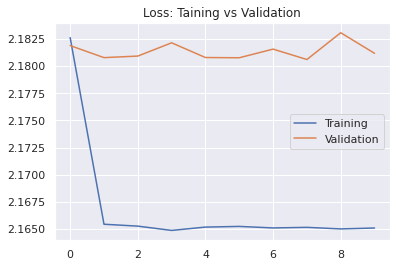

In [ ]:
plt.title('Loss: Taining vs Validation')
plt.plot(histmodelSimpleLSTM.history['loss'], label='Training')
plt.plot(histmodelSimpleLSTM.history['val_loss'], label='Validation')
plt.legend()
plt.show()

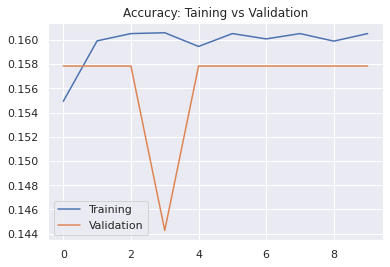

In [ ]:
plt.title('Accuracy: Taining vs Validation')
plt.plot(histmodelSimpleLSTM.history['accuracy'], label='Training')
plt.plot(histmodelSimpleLSTM.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()



---



#### ***1.4. Simple LSTM With Dropout***

As we have observed in the previous model, drop out layers are added so that few outputs from the neurons are randomly dropped out. This helps in making the model more robust where layers correct mistakes from the previous layers.

Results: Initially, the model was trained with batch size 64 and No_of_epoch = 10 After the model is trained with training data, we have achieved an accuracy of 14%. 
 
After adding Drop out layers, though validation and training accuracies are improved, the graphs show slight smooth convergence. But, interestingly, we do not see any improvement with testing accuracy.


In [ ]:
#################################### LSTM MODEL WITH DROPOUTS ############################################

# 1. Define a Network
modelSimpleLSTMWDrop = Sequential()

modelSimpleLSTMWDrop.add(Embedding(TOP_N1, EmbeddingDim, input_length=max_length))
modelSimpleLSTMWDrop.add(Dropout(0.3)) 
modelSimpleLSTMWDrop.add(LSTM(64)) 
modelSimpleLSTMWDrop.add(Dropout(0.3))
modelSimpleLSTMWDrop.add(Dense(10, activation='softmax')) 

print(modelSimpleLSTMWDrop.summary()) 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1000, 50)          4100000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000, 50)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 4,130,090
Trainable params: 4,130,090
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# 2. Compile Modle

optim = tf.keras.optimizers.Adam(lr=0.0001) 
metrics = ["accuracy"]
loss = 'sparse_categorical_crossentropy'

modelSimpleLSTMWDrop.compile(loss=loss, optimizer=optim, metrics=metrics)

In [ ]:
# Step 3: Fit Network
epochs = 10
batch_size = 64

histmodelSimpleLSTMWDrop = modelSimpleLSTMWDrop.fit(lyrics_train_padded, genre_train,
                                                    epochs=epochs, 
                                                    batch_size = batch_size, 
                                                    validation_data=(lyrics_valid_padded, genre_valid), 
                                                    verbose=1)

Epoch 1/10
677/677 [==============================] - 614s 907ms/step - loss: 2.1911 - accuracy: 0.1496 - val_loss: 2.1808 - val_accuracy: 0.1578
Epoch 2/10
677/677 [==============================] - 639s 944ms/step - loss: 2.1731 - accuracy: 0.1511 - val_loss: 2.1804 - val_accuracy: 0.1578
Epoch 3/10
677/677 [==============================] - 638s 943ms/step - loss: 2.1705 - accuracy: 0.1512 - val_loss: 2.1804 - val_accuracy: 0.1578
Epoch 4/10
677/677 [==============================] - 636s 939ms/step - loss: 2.1708 - accuracy: 0.1534 - val_loss: 2.1804 - val_accuracy: 0.1578
Epoch 5/10
677/677 [==============================] - 649s 959ms/step - loss: 2.1698 - accuracy: 0.1530 - val_loss: 2.1801 - val_accuracy: 0.1578
Epoch 6/10
677/677 [==============================] - 641s 947ms/step - loss: 2.1703 - accuracy: 0.1565 - val_loss: 2.1810 - val_accuracy: 0.1578
Epoch 7/10
677/677 [==============================] - 641s 948ms/step - loss: 2.1696 - accuracy: 0.1560 - val_loss: 2.1802 -

In [ ]:
modelSimpleLSTMWDrop.save('/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/saved_models/modelSimpleLSTMWDrop.h5')

In [ ]:
#Step 4: Evaluate Network
loss, accuracy = modelSimpleLSTM.evaluate(lyrics_test_padded, Genre_test)
print('Test set Loss:{:0.3f}\n Accuracy {:0.3f}'.format(loss, accuracy))

248/248 [==============================] - 32s 130ms/step - loss: 2.4482 - accuracy: 0.1399
Test set Loss:2.448
 Accuracy 0.140


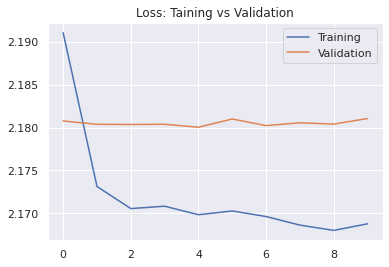

In [ ]:
plt.title('Loss: Taining vs Validation')
plt.plot(histmodelSimpleLSTMWDrop.history['loss'], label='Training')
plt.plot(histmodelSimpleLSTMWDrop.history['val_loss'], label='Validation')
plt.legend()
plt.show()

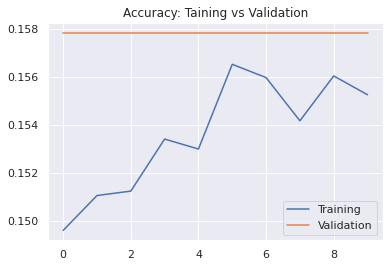

In [ ]:
plt.title('Accuracy: Taining vs Validation')
plt.plot(histmodelSimpleLSTMWDrop.history['accuracy'], label='Training')
plt.plot(histmodelSimpleLSTMWDrop.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()



---



#### ***1.5. Multi Layers LSTM With Dropouts***

Stacking layers of LSTM’s means passing the output sequences of one layer to the other which is done by adding return sequences= true in each layer. That is feeding the output of one layer to another. This is usually useful in cases where hierarchical data analysis is needed.





The Sequential Model is used throughout the project. Layers are stacked in a linear fashion instead of arbitrary.
**Embedding Layer:** Used to reduce the dimensionality of the input features by combining words with similar Euclidean distance. Similarity also depends on the context. This acts as a lookup a layer between the input layer and other layers.
**Dropout Layer:** Used to reduce the Overfitting  
**First LSTM Layer:** LSTM layer is used units = 32, indicating the dimensionality of the output space. Return sequences are made true.
**Dropout Layer:** Used to reduce the Overfitting
**Second LSTM Layer:** Unit cell of16 is used for better results.
**Dropout Layer:** Used to reduce the Overfitting
**Flatten Layer:** Used to flatten the data.
**Dense Layer:** Dense Layer collects/feeds data from the previous outputs and passes it to all its neurons. 
**Dropout Layer:** Used to reduce the Overfitting
**Dense Layer:** Dense Layer is the output layer.  




In [ ]:
############################## MULTI LAYER LSTM MODEL WITH DROPOUTS #########################

# 1. Define a Network
modelMultiLSTMWDrop = Sequential()

modelMultiLSTMWDrop.add(Embedding(TOP_N1, EmbeddingDim, input_length=max_length))
modelMultiLSTMWDrop.add(Dropout(0.3)) 
modelMultiLSTMWDrop.add(LSTM(32, return_sequences=True))
modelMultiLSTMWDrop.add(Dropout(0.3))
modelMultiLSTMWDrop.add(LSTM(16, return_sequences=True))
modelMultiLSTMWDrop.add(Dropout(0.3))
modelMultiLSTMWDrop.add(Dense(10, activation='relu')) 
modelMultiLSTMWDrop.add(Dropout(0.3))
modelMultiLSTMWDrop.add(Flatten())
modelMultiLSTMWDrop.add(Dense(10, activation='softmax')) 

print(modelMultiLSTMWDrop.summary()) 

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 1000, 50)          4124300   
_________________________________________________________________
dropout_31 (Dropout)         (None, 1000, 50)          0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 1000, 32)          10624     
_________________________________________________________________
dropout_32 (Dropout)         (None, 1000, 32)          0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 1000, 16)          3136      
_________________________________________________________________
dropout_33 (Dropout)         (None, 1000, 16)          0         
_________________________________________________________________
dense_16 (Dense)             (None, 1000, 10)         

In [ ]:
# 2. Compile Modle

optim = tf.keras.optimizers.Adam(lr=0.0001) 
metrics = ["accuracy"]
loss = 'sparse_categorical_crossentropy'

modelMultiLSTMWDrop.compile(loss=loss, optimizer=optim, metrics=metrics)

In [ ]:
# Step 3: Fit Network
epochs = 5
batch_size = 64

histmodelMultiLSTMWDrop = modelMultiLSTMWDrop.fit(lyrics_train_padded, genre_train, 
                                          epochs=epochs, 
                                          batch_size = batch_size, 
                                          validation_data=(lyrics_valid_padded, genre_valid), 
                                          verbose=1)

Epoch 1/5
677/677 [==============================] - 731s 1s/step - loss: 2.1310 - accuracy: 0.1909 - val_loss: 1.9758 - val_accuracy: 0.2767
Epoch 2/5
677/677 [==============================] - 733s 1s/step - loss: 1.8932 - accuracy: 0.3053 - val_loss: 1.7976 - val_accuracy: 0.3595
Epoch 3/5
677/677 [==============================] - 732s 1s/step - loss: 1.7311 - accuracy: 0.3821 - val_loss: 1.7565 - val_accuracy: 0.3803
Epoch 4/5
677/677 [==============================] - 738s 1s/step - loss: 1.6643 - accuracy: 0.4061 - val_loss: 1.7439 - val_accuracy: 0.3854
Epoch 5/5
677/677 [==============================] - 735s 1s/step - loss: 1.6147 - accuracy: 0.4281 - val_loss: 1.7424 - val_accuracy: 0.3887


In [ ]:
modelMultiLSTMWDrop.save('/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/saved_models/modelMultiLSTMWDrop.h5')

In [ ]:
#Step 4: Evaluate Network
loss, accuracy = modelMultiLSTMWDrop.evaluate(lyrics_test_padded, Genre_test)
print('Test set Loss:{:0.3f}\n Accuracy {:0.3f}'.format(loss, accuracy))

248/248 [==============================] - 32s 128ms/step - loss: 2.4971 - accuracy: 0.1492
Test set Loss:2.497
 Accuracy 0.149


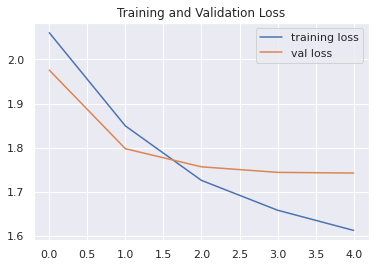

In [ ]:
plt.title('Training and Validation Loss')
plt.plot(histmodelMultiLSTMWDrop.history['loss'], label='training loss')
plt.plot(histmodelMultiLSTMWDrop.history['val_loss'], label='val loss')
plt.legend()
plt.show()

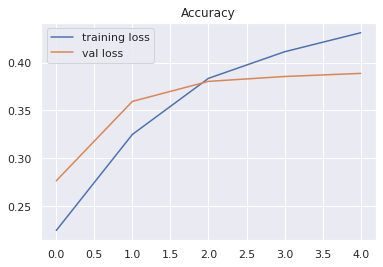

In [ ]:
plt.title('Accuracy')
plt.plot(histmodelMultiLSTMWDrop.history['accuracy'], label='training loss')
plt.plot(histmodelMultiLSTMWDrop.history['val_accuracy'], label='val loss')
plt.legend()
plt.show()



---



#### ***1.6. Convolutional Neural Network (CNN)***

Next, we have used a feedforward Convolutional Neural Network (CNN)

We considered the max_features representing the total vocabulary size with each lyric containing a maximum of 5000 words. We are trying to represent each word into a vector of 50 dimensions.
We build the model with an Embedding layer that represents each 'word' into a vector of 50 dimensions.

As text data is single-dimensional, We applied Conv1D with a filter size of:3
Applied Max Pooling to reduce the spatial dimension of the data while still capturing the essence/meaning of the underlying data.

Applied Dense to produce a fully connected layer by applying 'Relu' activation.
As the model is built for multi-class classification (10 Classes), We applied 'SoftMax' with dense on the final output layer.

We compiled the model with the below parameters.
'Adam' optimiser: It is very efficient and converges quickly and uses adaptive learning rate and momentum-based approach to calculate the weights.

'loss': We applied the cost function: 'SparseCategoricalCrossEntropy' as the model is multi-class classification.

'Metric': 'Accuracy' is used to measure the performance and effectiveness of the classification model.

Parameter Settings: Batch size =64, embedding dimension = 5, No_of_epoch = 5, optimizer = Adam and the metrics used for evaluation is accuracy. Sparse Categorical Cross Entropy is used to measure loss at each iteration since it is a multi-class classification problem. Softmax  activation is used to get values between probabilistic values.


In [ ]:
max_features = no_of_words # 100000 #68775
maxlen = 5000 # 10646
#embedding_dims = 128
embedding_size= 50 #8

We considered the max_features representing the total vocabulary size with each lyrics containing a maximum of 5000 words. We are trying to represent each word into a vector of 50 dimensions. 
- We build the model with Embedding layer that represent each 'word' into a vector of 50 dimensions.
- As text data is single dimensional, We applied Conv1D with filter size of:3
- Applied Maxpooling to reduce the spatial dimension of the data while still capturing the essence/meaning  of the underlying data.
- Applied Dense to produce fully connected layer by applying 'Relu' activation. 
- As the model is built for multi-class classification (10 Classes) , We applied 'SoftMax' with dense on the final output layer .


-  We complied the model with below parameters. 

1.   'Adam' optimiser: It is very efficient and converges quickly and uses adaptive learning rate and momentum based approach to calculate the weights. 
2.   'loss': We applied the cost function : 'SparseCategoricalCrossEntropy' as the model is multi-class classification.
3.    'Metric': 'Accuracy' is used to measure the performance and effectiveness of the classification model .

In [ ]:
modelCNN = Sequential()
modelCNN.add(Embedding(max_features,
                    embedding_size,
                    input_length=max_length))
modelCNN.add(Conv1D(250,3,padding='valid',activation='relu',strides=1))
modelCNN.add(GlobalMaxPooling1D())

modelCNN.add(Dense(200, activation='relu'))
modelCNN.add(Dense(10, activation='softmax'))

modelCNN.summary()

modelCNN.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 50)          1374500   
_________________________________________________________________
conv1d (Conv1D)              (None, 998, 250)          37750     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               50200     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 1,464,460
Trainable params: 1,464,460
Non-trainable params: 0
_________________________________________________________________


In [ ]:
histCNN = modelCNN.fit(lyrics_train_padded, genre_train,
          batch_size=64, 
          epochs=5,
          validation_data=(lyrics_valid_padded, genre_valid), verbose=1)

Epoch 1/5
677/677 [==============================] - 326s 480ms/step - loss: 2.0191 - accuracy: 0.2535 - val_loss: 1.6955 - val_accuracy: 0.4015
Epoch 2/5
677/677 [==============================] - 324s 479ms/step - loss: 1.5465 - accuracy: 0.4539 - val_loss: 1.6411 - val_accuracy: 0.4338
Epoch 3/5
677/677 [==============================] - 324s 478ms/step - loss: 1.2432 - accuracy: 0.5730 - val_loss: 1.6957 - val_accuracy: 0.4407
Epoch 4/5
677/677 [==============================] - 324s 479ms/step - loss: 0.8988 - accuracy: 0.7120 - val_loss: 1.8855 - val_accuracy: 0.4368
Epoch 5/5
677/677 [==============================] - 324s 479ms/step - loss: 0.5725 - accuracy: 0.8299 - val_loss: 2.1980 - val_accuracy: 0.4275


In [ ]:
modelCNN.save("/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/saved_models/modelCNN.h5")

In [ ]:
loss, accuracy = modelCNN.evaluate(lyrics_test_padded, Genre_test)
print('Test set Loss:{:0.3f}\n Accuracy {:0.3f}'.format(loss, accuracy))

248/248 [==============================] - 16s 65ms/step - loss: 4.0298 - accuracy: 0.1376
Test set Loss:4.030
 Accuracy 0.138


In [ ]:
################# FUNCTION TO PLOT  TRAIN vs VALIDATION LOSS  AND ACCURACY ######
def plotTrainTestLoss(histModel):
    import matplotlib.pyplot as plt

    plt.plot(histModel.history['accuracy'])
    plt.plot(histModel.history['val_accuracy'])

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

    plt.plot(histModel.history['loss'])
    plt.plot(histModel.history['val_loss'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

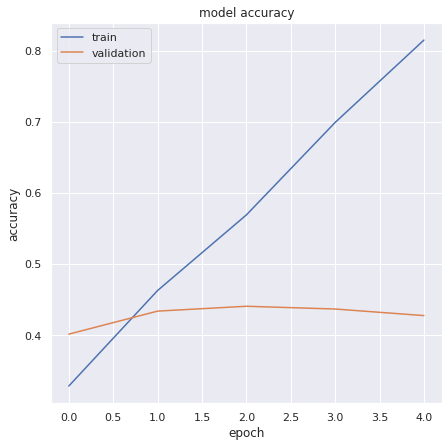

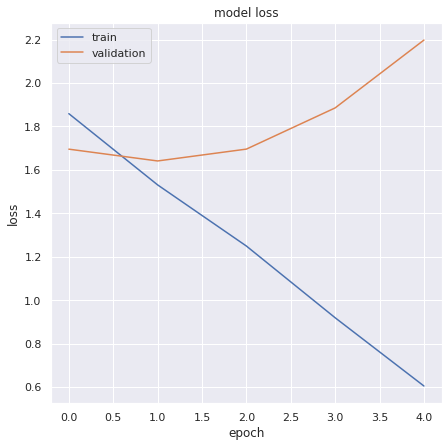

In [ ]:
plotTrainTestLoss(histCNN)

Model Accuracy improved for the training dataset with each epoch. However, Validation Accuracy is going down and hence this model suffers from overfitting.

#### **1.7. CNN Model with Heterogeneous filters**

We make use of one-dimensional convolutional layer CONV1D, as the text data is represented in vectors. So, we need to decide the spatial size of the output dimension as a function of input size(W), field size of the neurons(F), stride value(S) and a number of padding zeros to be used(P). 


We considered the max_features representing the total vocabulary size with each review containing a maximum of 5000 words. We are trying to represent each word into a vector of 50 dimensions.

*   We build the model with an Embedding layer that represents each 'word' into a vector of 50 dimensions. 
*   As text data is single-dimensional, We applied Conv1D with Heterogeneous filter sizes of:4,6,8
*   Applied 'DropOut' to avoid overfitting. In each iteration, Only 50% of the Neurons are active and others are Inactive/not considered through random sampling. 
*   Applied Max Pooling to reduce the spatial dimension of the data while still capturing the essence/meaning of the underlying data. 
*   Applied 'Flattening' to convert the three-dimensional matrix to a single sequence vector which is passed to a dense layer. 
*   We merged all Channels/feature maps built into a single channel. 
*   Applied Dense to produce a fully connected layer by applying 'Relu' activation. 
*   As the model is built for multi-class classification (10 Classes), We applied 'SoftMax' with dense on the final output layer. 
*   We compiled the model with the below parameters.



1.   'Adam' optimiser: It is very efficient and converges quickly and uses adaptive learning rate and momentum-based approach to calculate the weights.
2.   'loss': We applied the cost function: 'SparseCategoricalCrossEntropy' as the model is multi-class classification.
3.   'Metric': 'Accuracy' is used to measure the performance and effectiveness of the classification model.



Here, we have achieved a training accuracy of 74% and validation accuracy of 43% and we can also observe the testing accuracy of 14.7% which is slightly higher than all the previous models.  Due to constraints in the resources, we have just run this model only for 3 epochs. 

 


We considered the max_features representing the total vocabulary size with each review containing a maximum of 5000 words. We are trying to represent each word into a vector of 50 dimensions. 
- We build the model with Embedding layer that represent each 'word' into a vector of 50 dimensions.
- As text data is single dimensional, We applied Conv1D with Heterogeneous filter sizes of:4,6,8
- Applied 'DropOut' toa void over fitting.In each iteration, Only 50% of the Neurons are active and others are Inactive/not considered through random sampling.
- Applied Maxpooling to reduce the spatial dimension of the data while still capturing the essence/meaning  of the underlying data.
- Applied 'Flattening'  to convert the three-dimensional matrix to single sequence vector which is passed to a dense layer.
- We merged all Channels/feature maps built into single channel.
- Applied Dense to produce fully connected layer by applying 'Relu' activation. 
- As the model is built for multi-class classification (10 Classes) , We applied 'SoftMax' with dense on the final output layer.

-  We complied the model with below parameters. 

1.   'Adam' optimiser: It is very efficient and converges quickly and uses adaptive learning rate and momentum based approach to calculate the weights. 
2.   'loss': We applied the cost function : 'SparseCategoricalCrossEntropy' as the model is multi-class classification.
3.    'Metric': 'Accuracy' is used to measure the performance and effectiveness of the classification model .

In [ ]:
######################### CNN MODEL with multiple Layers and of diffrent Kernel Sizes #########################################
from keras import regularizers,models
import tensorflow as tf
from keras.layers import Input, concatenate
from keras.models import Model
max_lyrics_length = 1000 
vocab_size = no_of_words # 50000
length = max_lyrics_length
inputs = Input(shape=(length,))
################## Impelmenting Channel 1###################################################
embedding1 = Embedding(vocab_size, 500)(inputs)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPooling1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)
################## Impelmenting Channel 2 ###############################################
embedding2 = Embedding(vocab_size, 500)(inputs)
conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPooling1D(pool_size=2)(drop2)
flat2 = Flatten()(pool2)
################### Impelmenting Channel 3 ###############################################
embedding3 = Embedding(vocab_size, 500)(inputs)
conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPooling1D(pool_size=2)(drop3)
flat3 = Flatten()(pool3)
# ##################Merging all the channels ###############################################
merged = concatenate([flat1, flat2, flat3])
################## Final Model Building ###############################################
dense1 = Dense(200, activation='relu')(merged)
outputs = Dense(10, activation='softmax')(dense1)
modelMultiCNN = Model(inputs=[inputs], outputs=outputs)
################## Complie the model with adam optimizer ###############################################
modelMultiCNN.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])
# summarize
print(modelMultiCNN.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1000)]       0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1000, 500)    13866000    input_1[0][0]                    
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 1000, 500)    13866000    input_1[0][0]                    
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 1000, 500)    13866000    input_1[0][0]                    
______________________________________________________________________________________________

In [ ]:
historymodelMultiCNN = modelMultiCNN.fit(lyrics_train_padded, genre_train, validation_data=(lyrics_valid_padded, genre_valid), epochs=3, batch_size=128, verbose=1)

Epoch 1/3
339/339 [==============================] - 3730s 11s/step - loss: 1.9852 - accuracy: 0.2840 - val_loss: 1.6567 - val_accuracy: 0.4314
Epoch 2/3
339/339 [==============================] - 3617s 11s/step - loss: 1.3415 - accuracy: 0.5457 - val_loss: 1.6603 - val_accuracy: 0.4257
Epoch 3/3
339/339 [==============================] - 3129s 9s/step - loss: 0.7923 - accuracy: 0.7481 - val_loss: 1.8270 - val_accuracy: 0.4314


In [ ]:
loss, accuracy = modelMultiCNN.evaluate(lyrics_test_padded, Genre_test)
print('Test set Loss:{:0.3f}\n Accuracy {:0.3f}'.format(loss, accuracy))

248/248 [==============================] - 126s 507ms/step - loss: 2.9825 - accuracy: 0.1466
Test set Loss:2.982
 Accuracy 0.147


In [ ]:
modelMultiCNN.save("/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/saved_models/modelMultiCNN.h5")

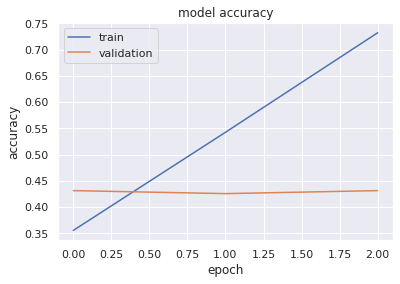

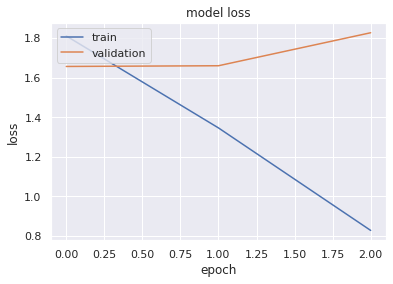

In [ ]:
plotTrainTestLoss(historymodelMultiCNN)

In [ ]:
# Step 5: Make Predictions

#Hip-hop
new_lyrics = ["Most folks spend their days daydreaming of finding clues My whole life I've been here at the train station shining shoes I started when I was nine, on my own and taught myself No complaints, I'm doing pretty good and I got my health Memories and callouses, my hearing's probably next to go Sometimes I do a little handywork for extra dough But mostly this here is how I spend my time And I've perfected a technique I call the dry shine Some guys use lots of water on the shoe but then when it's out in the open air The shine is gone in 10 minutes That whole approach to the job is dumb, in fact Dollars to donuts, that customer won't be coming back This is the most common mistake of the amateurs Going for big numbers to satisfy their managers Anyway, the dry shine, the first thing I mean to do And this part is very important I clean the shoe: the residue and old polish To keep a shoe from being ruined all you need to do is use a rag with some cleaning fluid If the shoe's all caked up with gunk you need to think The shoe can't breathe and that's what causes the feet to stink They took Carfoine off the market, I believe It was a few years ago, 'cause that leather couldn't breathe Now once you've cleaned the shoe and it's dried Your base coat of polish can now be applied Then you brush, 'cause what that tends to do Is clean the shoe a little more and gets rid of the residue And then you do the second coat just like the first one You brush it, you rag it, and voila, your work is done And that's it You treat each shoe like it's special Care about your work, and be a professional There's a right way to go about your job and a wrong one I find this way is much better in the long run It ain't about the dollar or trying to go fast Unless you take pride in what you're doing you won't last Craftsmanship is a quality that some lack You got to give people a reason for them to come back The world's a different place than what I was introduced to They don't wear shineable shoes like they used to Casual clothes in the office, what is this? The villain in sneakers is killing my business"]

#Indie
#new_lyrics = ["Take your cold hands and put them on my face Sharpen your axe and your criminal ways Let's go to town and do what we did before It's gonna hurt but we don't feel pain no more If you're alive can you say that you've tried to be someone who's true? Stuck in your shell Looking for help Come on out and things will soon change You gotta keep your head up Start your day by doing something good Treat a friend the way you know you should Like a cat in its cage I feel we're pacing around and never getting our way But if you know you're a mitt inside a sleeve, that's a fit and that's as good as it gets If you're alive can you say that you've tried to be someone who's true? Stuck in your shell Looking for help Come on out and things will soon change You gotta keep your head up You gotta keep your head up You gotta keep your head up Moving quickly Sure feels so empty I've thought about it and all the while I'm still doing the same old thing I can't say that I'll change or I'll find a new way Til I know who I am, that's right Inside my head I know I've seen a dream If you're alive can you say that you've tried to be someone who's true? Stuck in your shell Looking for help Come on out and things will soon change You gotta keep your head up You gotta keep it up I know that we'll find our way"]

#Metal
#new_lyrics = ["Are you ready it's time for war We'll break down these fucking doors Smash the windows, tear down the walls We won't stop 'til it's all destroyed Let it out, just let it show We'll burn it down, and we'll lose control Set the fires, can you feel the heat Tonight we're alive, there's no time to sleep Whoa oh! Riot! Whoa oh! Riot! Whoa here come the sirens, here comes the law Whoa oh, run from the sirens, run from the law Whoa oh! Round two, are you feeling alive? We'll overcome, we'll fucking survive Smash the boundaries, breaking the law We can't stop till it's all destroyed Let it out, just let it show We'll burn it down, we'll lose control Set the fires, can you feel the heat Tonight we're alive, there's no time to sleep? Whoa oh! Riot! Whoa oh! Riot! Whoa oh here come the sirens, here comes the law Whoa oh run from the sirens, run from the law Whoa oh! It's time to tear it all Riot Whoa oh! Riot Whoa here come the sirens, here comes the law Whoa run from the sirens, run from the law Whoa oh! Whoa oh! Riot"]

seq = tokenizer.texts_to_sequences(new_lyrics)
padded = sequence.pad_sequences(seq, maxlen=500, padding="post", truncating="post")

pred = modelMultiCNN.predict(padded)
labels = ['Rock', 'Metal', 'Pop', 'Indie', 'Folk', 'Electronic', 'R&B','Jazz', 'Hip-Hop', 'Country']
print(pred, labels[np.argmax(pred)])

#### ***1.8. CNN with LSTM***

We are trying to add additional LSTM layer after convolution is applied.
*   **Model Type:** Sequential as the data passes from one layer to other Layer in Sequence.
*   **Embedding:**  This layer is to represent each 'word' into 50 dimensions.
*   **Dropout:**  Applied drop out in each layer to avoid over fitting of the data. We have applied different 'dropout' ratios across different layers.
*   **Maxpooling:** is applied  to reduce the spatial dimension of the data while still capturing the essence/meaning  of the underlying data.
*   **LSTM:** Added LSTM layer that uses 32 units
*   **Dense Layer:** is applied to build fully connected network with 200 Neurons using 'Relu' activation function. 
*   **Output Layer:** Softmax is applied due to multi-class classification nature of the issue.

Parameter Settings: Batch size =64, embedding dimension = 50, No_of_epoch = 10, optimizer = Adam and the metrics used for evaluation is accuracy. Sparse Categorical Cross Entropy is used to measure loss at each iteration since it is a multi-class classification problem. Softmax  activation is used to get values between probabilistic values.

Here, we have achieved a training accuracy of 16% and validation accuracy of 15% and we can also observe the testing accuracy of 14% which is the same as most of the other models.  The constant value in validation accuracy shows overfitting of data.


In [ ]:
########################################### CNN With LSTM ##################################################################
import tensorflow as tf
#embedding_vector_length = 64
#top_words=20000 

modelCNNWithLSTM = Sequential()
modelCNNWithLSTM.add( Embedding(vocab_size1, EmbeddingDim,input_length=max_length))
modelCNNWithLSTM.add(Dropout(0.2))
modelCNNWithLSTM.add(Conv1D(filters=64, kernel_size=4, padding='valid', activation='relu',strides =1,kernel_regularizer = tf.keras.regularizers.l2(3)))
modelCNNWithLSTM.add(MaxPooling1D(pool_size=4))
modelCNNWithLSTM.add(LSTM(64))
modelCNNWithLSTM.add(Dropout(0.2))
modelCNNWithLSTM.add(Dense(200, activation='relu'))
modelCNNWithLSTM.add(Dense(10, activation='softmax'))
modelCNNWithLSTM.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])
print(modelCNNWithLSTM.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 50)          4144100   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000, 50)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 997, 64)           12864     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 249, 64)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)              

In [ ]:
historymodelCNNWithLSTM = modelCNNWithLSTM.fit(lyrics_train_padded, genre_train, validation_data=(lyrics_valid_padded, genre_valid), epochs=10, batch_size=64)

Epoch 1/10
677/677 [==============================] - 333s 489ms/step - loss: 32.0686 - accuracy: 0.1490 - val_loss: 2.1820 - val_accuracy: 0.1578
Epoch 2/10
677/677 [==============================] - 343s 506ms/step - loss: 2.1662 - accuracy: 0.1598 - val_loss: 2.1830 - val_accuracy: 0.1578
Epoch 3/10
677/677 [==============================] - 342s 506ms/step - loss: 2.1694 - accuracy: 0.1554 - val_loss: 2.1818 - val_accuracy: 0.1578
Epoch 4/10
677/677 [==============================] - 342s 505ms/step - loss: 2.1653 - accuracy: 0.1606 - val_loss: 2.1812 - val_accuracy: 0.1578
Epoch 5/10
677/677 [==============================] - 338s 499ms/step - loss: 2.1653 - accuracy: 0.1584 - val_loss: 2.1827 - val_accuracy: 0.1578
Epoch 6/10
677/677 [==============================] - 339s 500ms/step - loss: 2.1658 - accuracy: 0.1560 - val_loss: 2.1824 - val_accuracy: 0.1578
Epoch 7/10
677/677 [==============================] - 338s 499ms/step - loss: 2.1677 - accuracy: 0.1605 - val_loss: 2.1801 

In [ ]:
loss, accuracy = modelCNNWithLSTM.evaluate(lyrics_test_padded, Genre_test)
print('Test set Loss:{:0.3f}\n Accuracy {:0.3f}'.format(loss, accuracy))

248/248 [==============================] - 16s 64ms/step - loss: 2.4438 - accuracy: 0.1399
Test set Loss:2.444
 Accuracy 0.140


Accuracy 0.140

In [ ]:
modelCNNWithLSTM.save("/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/saved_models/modelCNNWithLSTM.h5")

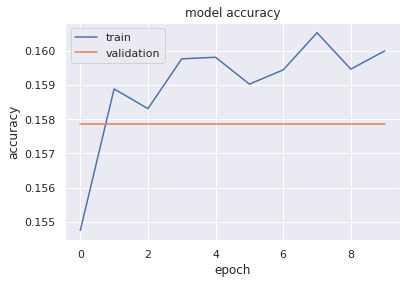

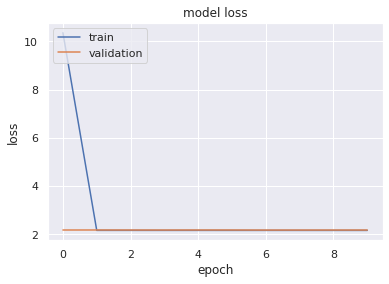

In [ ]:
plotTrainTestLoss(historymodelCNNWithLSTM)

#### ***1.9. Pre-trained Embedding (Glove)***

Embeddings provide a great way to reduce the dimensionality of inputs. Although embeddings used above on the fly converge similar words to a single vector, pre-trained vectors have more advantage. As the Stanford site defines 

“GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space. ”

The gloVe allows us to take a corpus of text, and then intuitively transform each word in that corpus into a position in a high-dimensional space. This means that similar words will be placed together. Here, for this experiment, we have used glove.6B.300d.txt. To load the pre-trained vectors, we have created a dictionary that holds the mapping of words and the corresponding embedding vectors for those words.
The below figure represents the implementation of the Pre-Trained Embedding Layer over the LSTM Model


Parameter Settings: Batch size =64, embedding dimension = 300, No_of_epoch = 5, optimizer = Adam and the metrics used for evaluation is accuracy. Sparse Categorical Cross Entropy is used to measure loss at each iteration since it is a multi-class classification problem. Softmax  activation is used to get values between probabilistic values.

 

As we see from the results, the model showed optimum accuracy results with the embedding layer. The constant accuracy of showing the tendency of overfitting. More training epochs can affect the results


In [ ]:
embeddings_index = dict()

f = open('/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/glove.6B.300d.txt', encoding= 'utf-8')

for line in f:
  values= line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word]=coefs
f.close()

print('Loaded {} word vectors'.format(len(embeddings_index)))

Loaded 400000 word vectors


In [ ]:
%%time

# Create a weight matrix for words in traing doc
vocab_size = len(tokenizer.word_index)+1

print('Creating the embedding matrix')
embedding_matrix = np.zeros((vocab_size, 300))

for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

Get vocab_size
Creating the embedding matrix
CPU times: user 112 ms, sys: 15 µs, total: 112 ms
Wall time: 111 ms


In [ ]:
pretrainedmodel = Sequential()
pretrainedmodel.add(Embedding(vocab_size,
                              300,
                              weights=[embedding_matrix],
                              input_length=max_length,
                              trainable=False))
pretrainedmodel.add(LSTM(128))
pretrainedmodel.add(Dropout(0.3))
pretrainedmodel.add(Dense(64, activation='relu'))
pretrainedmodel.add(Dropout(0.3))
pretrainedmodel.add(Flatten())
pretrainedmodel.add(Dense(10, activation='softmax'))

pretrainedmodel.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1000, 300)         11585700  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               219648    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
# 2. Compile Modle

optim = tf.keras.optimizers.Adam(lr=0.0001) 
metrics = ["accuracy"]
loss = 'sparse_categorical_crossentropy'

pretrainedmodel.compile(loss=loss, optimizer=optim, metrics=metrics)

In [ ]:
# Step 3: Fit Network
epochs = 5
batch_size = 64

histpretrainedmodel = pretrainedmodel.fit(lyrics_train_padded, genre_train, epochs=epochs, batch_size = batch_size, validation_data=(lyrics_valid_padded, genre_valid), verbose=1)

Epoch 1/5
677/677 [==============================] - 2070s 3s/step - loss: 2.2295 - accuracy: 0.1433 - val_loss: 2.1918 - val_accuracy: 0.1578
Epoch 2/5
677/677 [==============================] - 2079s 3s/step - loss: 2.1866 - accuracy: 0.1456 - val_loss: 2.1808 - val_accuracy: 0.1578
Epoch 3/5
677/677 [==============================] - 2071s 3s/step - loss: 2.1809 - accuracy: 0.1467 - val_loss: 2.1807 - val_accuracy: 0.1578
Epoch 4/5
677/677 [==============================] - 2070s 3s/step - loss: 2.1735 - accuracy: 0.1503 - val_loss: 2.1811 - val_accuracy: 0.1578
Epoch 5/5
677/677 [==============================] - 2059s 3s/step - loss: 2.1723 - accuracy: 0.1543 - val_loss: 2.1801 - val_accuracy: 0.1578


In [ ]:
pretrainedmodel.save('/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/saved_models/pretrainedmodel.h5')

In [ ]:
#Step 4: Evaluate Network
loss, accuracy = pretrainedmodel.evaluate(lyrics_test_padded, Genre_test)
print('Test set Loss:{:0.3f}\n Accuracy {:0.3f}'.format(loss, accuracy))

248/248 [==============================] - 148s 598ms/step - loss: 2.4192 - accuracy: 0.1399
Test set Loss:2.419
 Accuracy 0.140


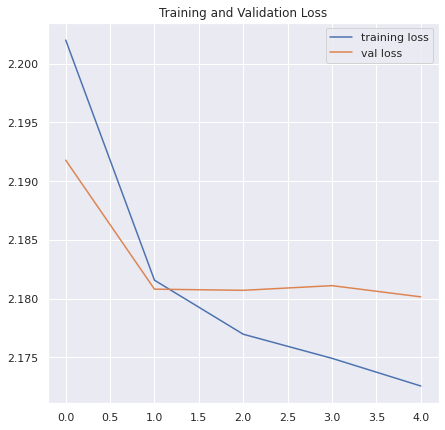

In [ ]:
plt.title('Training and Validation Loss')
plt.plot(histpretrainedmodel.history['loss'], label='training loss')
plt.plot(histpretrainedmodel.history['val_loss'], label='val loss')
plt.legend()
plt.show()

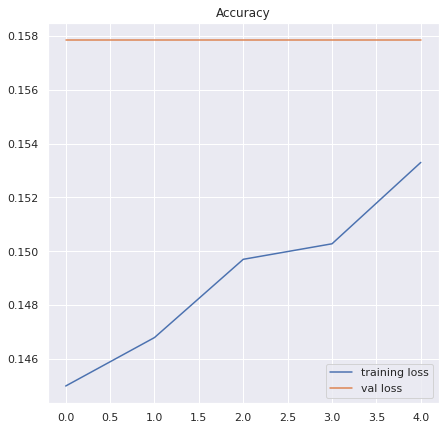

In [ ]:
plt.title('Accuracy')
plt.plot(histpretrainedmodel.history['accuracy'], label='training loss')
plt.plot(histpretrainedmodel.history['val_accuracy'], label='val loss')
plt.legend()
plt.show()

#### ***Prediction***

In [ ]:
# Step 5: Make Predictions

#Hip-hop
#new_lyrics = ["Most folks spend their days daydreaming of finding clues My whole life I've been here at the train station shining shoes I started when I was nine, on my own and taught myself No complaints, I'm doing pretty good and I got my health Memories and callouses, my hearing's probably next to go Sometimes I do a little handywork for extra dough But mostly this here is how I spend my time And I've perfected a technique I call the dry shine Some guys use lots of water on the shoe but then when it's out in the open air The shine is gone in 10 minutes That whole approach to the job is dumb, in fact Dollars to donuts, that customer won't be coming back This is the most common mistake of the amateurs Going for big numbers to satisfy their managers Anyway, the dry shine, the first thing I mean to do And this part is very important I clean the shoe: the residue and old polish To keep a shoe from being ruined all you need to do is use a rag with some cleaning fluid If the shoe's all caked up with gunk you need to think The shoe can't breathe and that's what causes the feet to stink They took Carfoine off the market, I believe It was a few years ago, 'cause that leather couldn't breathe Now once you've cleaned the shoe and it's dried Your base coat of polish can now be applied Then you brush, 'cause what that tends to do Is clean the shoe a little more and gets rid of the residue And then you do the second coat just like the first one You brush it, you rag it, and voila, your work is done And that's it You treat each shoe like it's special Care about your work, and be a professional There's a right way to go about your job and a wrong one I find this way is much better in the long run It ain't about the dollar or trying to go fast Unless you take pride in what you're doing you won't last Craftsmanship is a quality that some lack You got to give people a reason for them to come back The world's a different place than what I was introduced to They don't wear shineable shoes like they used to Casual clothes in the office, what is this? The villain in sneakers is killing my business"]

#Indie
new_lyrics = ["Take your cold hands and put them on my face Sharpen your axe and your criminal ways Let's go to town and do what we did before It's gonna hurt but we don't feel pain no more If you're alive can you say that you've tried to be someone who's true? Stuck in your shell Looking for help Come on out and things will soon change You gotta keep your head up Start your day by doing something good Treat a friend the way you know you should Like a cat in its cage I feel we're pacing around and never getting our way But if you know you're a mitt inside a sleeve, that's a fit and that's as good as it gets If you're alive can you say that you've tried to be someone who's true? Stuck in your shell Looking for help Come on out and things will soon change You gotta keep your head up You gotta keep your head up You gotta keep your head up Moving quickly Sure feels so empty I've thought about it and all the while I'm still doing the same old thing I can't say that I'll change or I'll find a new way Til I know who I am, that's right Inside my head I know I've seen a dream If you're alive can you say that you've tried to be someone who's true? Stuck in your shell Looking for help Come on out and things will soon change You gotta keep your head up You gotta keep it up I know that we'll find our way"]

#Metal
#new_lyrics = ["Are you ready it's time for war We'll break down these fucking doors Smash the windows, tear down the walls We won't stop 'til it's all destroyed Let it out, just let it show We'll burn it down, and we'll lose control Set the fires, can you feel the heat Tonight we're alive, there's no time to sleep Whoa oh! Riot! Whoa oh! Riot! Whoa here come the sirens, here comes the law Whoa oh, run from the sirens, run from the law Whoa oh! Round two, are you feeling alive? We'll overcome, we'll fucking survive Smash the boundaries, breaking the law We can't stop till it's all destroyed Let it out, just let it show We'll burn it down, we'll lose control Set the fires, can you feel the heat Tonight we're alive, there's no time to sleep? Whoa oh! Riot! Whoa oh! Riot! Whoa oh here come the sirens, here comes the law Whoa oh run from the sirens, run from the law Whoa oh! It's time to tear it all Riot Whoa oh! Riot Whoa here come the sirens, here comes the law Whoa run from the sirens, run from the law Whoa oh! Whoa oh! Riot"]



seq = tokenizer.texts_to_sequences(new_lyrics)
padded = pad_sequences(seq, maxlen=300, padding="post", truncating="post")
pred = model.predict(padded)
labels = ['Rock', 'Metal', 'Pop', 'Indie', 'Folk', 'Electronic', 'R&B','Jazz', 'Hip-Hop', 'Country']
print(pred, labels[np.argmax(pred)])

In [ ]:
# Reading Training data
url1= '/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/test.csv'


test = pd.read_csv(url1, sep=',')

In [ ]:
test.head()

In [ ]:
test = test[['Genre', 'Lyrics']]

In [ ]:
test.head()

### **Part 2: Transfer Learning**

Transfer learning is a technique where a model developed for a task is reused as the starting point for a model on a second task. In this section, we will use the models built in Part 1 genre prediction to predict the artist for a given lyric. 

#### ***Data Preparation***

For the new task, we will build a dataset by combining both the training and test dataset from the previous task. English makes up the majority of the dataset so we filter for English only and remove the other languages from the dataset. Next, we find the top 10 artists by counting the entries for each of the artists.


Then, we removed all the data except these ten artists and we have also removed all the columns except the Artist and the Lyrics columns. Now, from this dataset, we have kept 10% for validation and the rest for training purposes. 
Next, we want the dataset to consist of artists and their lyrics for each instance so we create a new df that only uses these two columns. With only 10 artists we can map each artist to a numeric value so that we can perform computation.


Once we are satisfied with the number of artists we can preprocess the lyrics data. We will remove stop words, punctuation and digits from the column. We also use lemmatization which will help reduce the complexity in the text data. 
To further reduce the complexity in the dataset we use the count function with the min_occurance set to 1. 


In [ ]:
# Reading Training data
url= '/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/train.csv'


df1 = pd.read_csv(url, sep=',')

# First 5 rows of the dataset
df1.head()

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...


In [ ]:
# Filtering the data only for English language
df1 = df1[(df1['Language']=='en')]

In [ ]:
# Reading Test data
url1= '/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/test.csv'


df2 = pd.read_csv(url1, sep=',')


# First 5 rows of the dataset
df2.head()

,Song,Song year,Artist,Genre,Lyrics,Track_id
0,craftsmanship,2005,buck-65,Hip-Hop,Most folks spend their days daydreaming of fin...,8294
1,come-on-out,2012,the-elwins,Indie,Take your cold hands and put them on my face\n...,21621
2,riot,2013,bullet-for-my-valentine,Metal,Are you ready it's time for war\nWe'll break d...,3301
3,that-s-what-girls-do,2007,dream-street,Pop,You ask me why I change the color of my hair\n...,2773
4,believe-in-a-dollar,2012,cassidy,Hip-Hop,Do you believe in magic in a young girl's hear...,16797


Here, the primary task is to predict the Artist from the Lyrics using the best model that we have trained in the previous task. So all we need the Artist and the Lyrics columns from the dataset. 

In [ ]:
df1 = df1[['Artist', 'Lyrics']]

In [ ]:
df1.head()

,Artist,Lyrics
0,12 stones,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,"Biting the hand that feeds you, lying to the v..."
3,12 stones,You say you know just who I am\nBut you can't ...
4,12 stones,My heart is beating faster can't control these...


In [ ]:
df1.shape

(250197, 2)

In [ ]:
df2 = df2[['Artist', 'Lyrics']]

In [ ]:
df2.head()

,Artist,Lyrics
0,buck-65,Most folks spend their days daydreaming of fin...
1,the-elwins,Take your cold hands and put them on my face\n...
2,bullet-for-my-valentine,Are you ready it's time for war\nWe'll break d...
3,dream-street,You ask me why I change the color of my hair\n...
4,cassidy,Do you believe in magic in a young girl's hear...


In [ ]:
df2.shape

(7935, 2)

In [ ]:
df = pd.concat([df1, df2], axis=0)

In [ ]:
df.head()

,Artist,Lyrics
0,12 stones,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,"Biting the hand that feeds you, lying to the v..."
3,12 stones,You say you know just who I am\nBut you can't ...
4,12 stones,My heart is beating faster can't control these...


In [ ]:
df.shape

(258132, 2)

In [ ]:
df['Artist'].value_counts().sort_values(ascending=False)[:10]

elvis presley         1598
chris brown           1238
elvis costello         920
ella fitzgerald        872
the rolling stones     813
bee gees               805
glee                   763
bad religion           748
beyonce                731
elton john             716
Name: Artist, dtype: int64

In [ ]:
map = df.Artist.isin(['elvis presley', 'chris brown', 'elvis costello', 'ella fitzgerald', 'the rolling stones', 'bee gees', 'glee', 'bad religion', 'beyonce', 'elton john'])

In [ ]:
df= df[map]

In [ ]:
df

,Artist,Lyrics
3791,bad religion,"I don't need to be a global citizen,\n'Cuz I'm..."
3792,bad religion,"Infected\nNow here I go,\nHope I don't break d..."
3793,bad religion,I'm going for a walk\nnot the after dinner kin...
3794,bad religion,Father can you hear me?\nHow have I let you do...
3795,bad religion,There's a place where everyone can be happy\nI...
...,...,...
289878,ella fitzgerald,You're just too marvelous Too marvelous for wo...
289948,chris brown,"Up, high, down, low I be anywhere you want Not..."
290027,ella fitzgerald,"Don't stamp your foot at me, It's impolite To ..."
1574,beyonce,"Six inch heels, she walked in the club like no..."


In [ ]:
df.shape

(9204, 2)

In [ ]:
mapping = {'elvis presley':0, 'chris brown':1, 'elvis costello':2, 'ella fitzgerald':3, 'the rolling stones':4, 'bee gees':5, 'glee':6, 'bad religion':7, 'beyonce':8, 'elton john':9}

In [ ]:
df.Artist = df.Artist.map(mapping)

In [ ]:
# Unique values of Genre column
print(df.Artist.unique())

# Number records for each of the Genre
df.groupby(['Artist']).count()

[7 2 0 4 8 1 5 9 6 3]


,Lyrics
Artist,
0,1598
1,1238
2,920
3,872
4,813
5,805
6,763
7,748
8,731


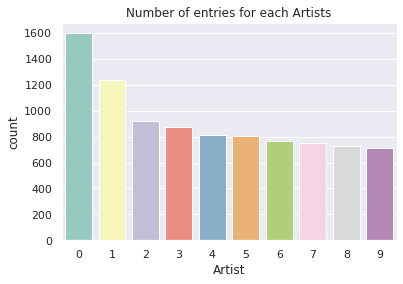

In [ ]:
# Artist vs Frequency
sns.countplot(x='Artist', data=df, palette='Set3')
plt.title("Number of entries for each Artists")
plt.show()

In [ ]:
df.shape

(9204, 2)

In [ ]:
#filtered_df.to_csv('/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/filtered_df.csv', index = False)

In [ ]:
# Reading Training data
#url= '/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/filtered_df.csv'


#df = pd.read_csv(url, sep=',')

In [ ]:
# Finding NaN values for Genre column
print(df.Artist.isna().sum())


# Finding Null values for Genre column
print(df.Artist.isnull().sum())

print((df.Artist.isna().sum() / (df.Artist.count() + df.Artist.isna().sum()))*100)

0
0
0.0


In [ ]:
df.head()

,Artist,Lyrics
3791,7,"I don't need to be a global citizen,\n'Cuz I'm..."
3792,7,"Infected\nNow here I go,\nHope I don't break d..."
3793,7,I'm going for a walk\nnot the after dinner kin...
3794,7,Father can you hear me?\nHow have I let you do...
3795,7,There's a place where everyone can be happy\nI...


In [ ]:
# Removing special characters
df["Lyrics"] = df.Lyrics.map(remove_punct)

print("Special Characters are removed!")

Special Characters are removed!


In [ ]:
# Removing of Digits
df['Lyrics'] = df.Lyrics.map(remove_number)
print("Digits are removed!")

Digits are removed!


In [ ]:
#Removing the stop Words
df['Lyrics'] = df.Lyrics.map(remove_english_stopword)
print("Stop words are removed!!")

Stop words are removed!!


In [ ]:
# Lemmatization of words
df['Lyrics'] = df.Lyrics.map(lemmaSentence)
print("Words are Lemmatized!!")

Words are Lemmatized!!


In [ ]:
df

,Artist,Lyrics
3791,7,dont need global citizen cuz im blessed nation...
3792,7,infected go hope dont break wont take anything...
3793,7,im going walk dinner kind im gon na use hand i...
3794,7,father hear let curse day born sorrow world le...
3795,7,there place everyone happy beautiful place who...
...,...,...
289878,3,youre marvelous marvelous word like glorious g...
289948,1,high low anywhere want one slipping im sliding...
290027,3,dont stamp foot impolite stamp foot quite righ...
1574,8,six inch heel walked club like nobody business...


In [ ]:
# Counting the number of differnt words.
count2 = count_word(df.Lyrics)
print(len(count))
# Top 10 most frequent words
count2.most_common(10)

27590


[('im', 20845),
 ('love', 19031),
 ('dont', 14848),
 ('know', 14728),
 ('like', 13989),
 ('got', 13483),
 ('oh', 12737),
 ('baby', 11578),
 ('na', 10121),
 ('girl', 10019)]

In [ ]:
min_occurance = 1

count2 = [k for k, c in count2.items() if c >= min_occurance ]

no_of_words2 = len(count2)
print(no_of_words2)


23948


#### ***Train-Test Data***

We split the dataset into testing and validation (lyrics_train, lyrics_valid, artist_train, artist_valid). First to tokenize is the lyrics_train dataset. We convert the string in each instance to individual tokens. 

Print lyrics and corresponding sequence, each word is represented as a vector for both lyrics_train and lyrics_valid. Next, we want to use pad_sequences so each instance has the same length.  


In [ ]:
from sklearn.model_selection import train_test_split

data, label = df.Lyrics, df.Artist
# split again, and we should see the same split
lyrics2_train, lyrics2_valid, Artist_train, Artist_valid = train_test_split(data, label, test_size=0.1, random_state=10)

In [ ]:
# Tokenizer API
from tensorflow.keras.preprocessing.text import Tokenizer

# Vectorization parameters
# Limit on the number of features. We use the top 20K features.
TOP_N = no_of_words2

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=TOP_N)
tokenizer.fit_on_texts(lyrics2_train) # fit only to training

In [ ]:
vocab_size3 = len(tokenizer.word_index) + 1
print("Vocabulary Size: ", vocab_size3)

Vocabulary Size:  23327


In [ ]:
lyrics2_train_seq = tokenizer.texts_to_sequences(lyrics2_train)
lyrics2_valid_seq = tokenizer.texts_to_sequences(lyrics2_valid)

In [ ]:
print(lyrics2_train[:1])
print(lyrics2_train_seq[:1])

74409    yea go wanted right black shade dark tent yo g...
Name: Lyrics, dtype: object
[[501, 12, 414, 31, 286, 1119, 347, 4790, 242, 10, 68, 11, 726, 13390, 3445, 1741, 2578, 945, 7783, 1023, 1031, 109, 650, 5226, 2304, 884, 4, 11, 280, 2062, 5, 7784, 1, 393, 5831, 452, 1272, 299, 242, 10, 1273, 1078, 53, 242, 61, 6, 59, 253, 2304, 68, 383, 1466, 265, 13391, 104, 135, 11, 1510, 1885, 5, 64, 342, 107, 467, 7785, 64, 1359, 974, 127, 152, 474, 62, 10, 46, 387, 1359, 1, 1, 237, 1070, 1031, 25, 1, 177, 465, 626, 8714, 11, 3758, 286, 581, 829, 23, 2097, 7, 489, 12, 926, 27, 3549, 143, 126, 68, 2623, 2395, 13392, 1511, 315, 6, 4609, 8715, 5, 13393, 58, 63, 198, 262, 543, 1518, 5, 1274, 916, 85, 916, 3759, 148, 10, 17, 143, 1958, 331, 175, 25, 774, 197, 278, 1428, 25, 1, 2954, 1003, 1003, 46, 1176, 133, 548, 1860, 5, 1, 87, 228, 133, 3654, 1823, 1, 679, 68, 3294, 47, 13394, 11, 2396, 7786, 7787, 1, 540, 314, 104, 39, 474, 313, 140, 100, 272, 1, 7, 2624, 433, 68, 665, 421, 7788, 22, 2242, 24, 

In [ ]:
print(lyrics2_valid[:1])
print(lyrics2_valid_seq[:1])

74153    swear got filter filter swear got filter filte...
Name: Lyrics, dtype: object
[[559, 6, 3546, 3546, 559, 6, 3546, 3546, 2705, 6, 779, 27, 483, 486, 38, 117, 73, 9601, 127, 6, 73, 1, 16, 1, 16, 1, 87, 16, 1, 87, 16, 6, 5885, 182, 2466, 58, 13341, 100, 10, 143, 35, 49, 718, 296, 10, 46, 676, 1, 16, 1, 16, 1, 87, 16, 1, 87, 16, 18, 106, 200, 170, 40, 31, 559, 6, 3546, 3546, 559, 6, 3546, 3546, 1, 143, 45, 6, 3546, 13380, 1, 143, 45, 58, 3546, 4, 3, 45, 143, 465, 360, 295, 344, 38, 25, 6265, 14, 11, 873, 6582, 2932, 6373, 22990, 8050, 1, 16, 1, 16, 1, 87, 16, 1, 87, 16, 18, 5801, 4938, 7792, 23, 33, 9, 9328, 35, 35, 6, 59, 12, 35, 1, 16, 13, 1695, 16, 1, 87, 16, 1, 87, 16, 18, 106, 200, 170, 40, 31, 559, 6, 3546, 3546, 559, 6, 3546, 3546, 1, 143, 45, 6, 3546, 13380, 1, 143, 45, 58, 3546, 2705, 6, 779, 27, 483, 486, 2705, 6, 779, 6, 59, 12, 35, 1, 16, 1, 16, 1, 16, 1, 16, 18, 106, 200, 170, 40, 31, 559, 6, 3546, 33, 9, 564, 421, 3546, 559, 6, 3546, 3546, 1, 143, 45, 6, 3546, 13380,

In [ ]:
MAX_SEQUENCE_LENGTH = 1000

# Get max sequence length.
max_length2 = len(max(lyrics2_train, key=len))
if max_length2 > MAX_SEQUENCE_LENGTH:
  max_length2 = MAX_SEQUENCE_LENGTH

print(max_length2)

1000


In [ ]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

lyrics2_train_padded = pad_sequences(lyrics2_train_seq, maxlen=max_length2, padding="post", truncating="post")
lyrics2_valid_padded = pad_sequences(lyrics2_valid_seq, maxlen=max_length2, padding="post", truncating="post")

In [ ]:
print(lyrics2_train[:1])
print(lyrics2_train_seq[0])
print(lyrics2_train_padded[0])

74409    yea go wanted right black shade dark tent yo g...
Name: Lyrics, dtype: object
[501, 12, 414, 31, 286, 1119, 347, 4790, 242, 10, 68, 11, 726, 13390, 3445, 1741, 2578, 945, 7783, 1023, 1031, 109, 650, 5226, 2304, 884, 4, 11, 280, 2062, 5, 7784, 1, 393, 5831, 452, 1272, 299, 242, 10, 1273, 1078, 53, 242, 61, 6, 59, 253, 2304, 68, 383, 1466, 265, 13391, 104, 135, 11, 1510, 1885, 5, 64, 342, 107, 467, 7785, 64, 1359, 974, 127, 152, 474, 62, 10, 46, 387, 1359, 1, 1, 237, 1070, 1031, 25, 1, 177, 465, 626, 8714, 11, 3758, 286, 581, 829, 23, 2097, 7, 489, 12, 926, 27, 3549, 143, 126, 68, 2623, 2395, 13392, 1511, 315, 6, 4609, 8715, 5, 13393, 58, 63, 198, 262, 543, 1518, 5, 1274, 916, 85, 916, 3759, 148, 10, 17, 143, 1958, 331, 175, 25, 774, 197, 278, 1428, 25, 1, 2954, 1003, 1003, 46, 1176, 133, 548, 1860, 5, 1, 87, 228, 133, 3654, 1823, 1, 679, 68, 3294, 47, 13394, 11, 2396, 7786, 7787, 1, 540, 314, 104, 39, 474, 313, 140, 100, 272, 1, 7, 2624, 433, 68, 665, 421, 7788, 22, 2242, 24, 1

In [ ]:
print(Artist_train[:3])
print(Artist_valid[:3])

74409     1
101708    9
71687     8
Name: Artist, dtype: int64
74153     1
71796     8
166590    0
Name: Artist, dtype: int64


#### ***Model Building***

Multi-Layer LSTM with Dropout is one of the models that gave us higher accuracy (14.9%) with the test data. So we have saved this model in a serialized format (.h5) and then use the same for the classification of Artist. We have frozen all the layers except the last layer which is then replaced by a new dense layer with a Softmax activation function. 

#### ***Model 1: Pre-trained ( Multi-Layer LSTM with Dropouts)***

Using the pre-trained model with batch size 64 and epochs 10, we have achieved 29% accuracy with the validation data and one point to be noted, since all the layers are set to freeze the training decreased significantly.

 
As we see from the results, the model showed optimum accuracy and the graphs show a slow convergence towards loss that indicates more training epochs can affect the results.


In [ ]:
from keras import models
############ Loading the model which is saved along with the parameters ######################
bestmodel1 = models.load_model('/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/saved_models/modelMultiLSTMWDrop.h5')

In [ ]:
print(bestmodel1.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 1000, 50)          4124300   
_________________________________________________________________
dropout_31 (Dropout)         (None, 1000, 50)          0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 1000, 32)          10624     
_________________________________________________________________
dropout_32 (Dropout)         (None, 1000, 32)          0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 1000, 16)          3136      
_________________________________________________________________
dropout_33 (Dropout)         (None, 1000, 16)          0         
_________________________________________________________________
dense_16 (Dense)             (None, 1000, 10)         

In [ ]:
## Trainable is set to false for all the layers except the last layer
for layer in bestmodel1.layers:#  [:-1]:
  layer.trainable = False

In [ ]:
for layer in bestmodel1.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.layers.embeddings.Embedding object at 0x7f066c839a10> False
<tensorflow.python.keras.layers.core.Dropout object at 0x7f062c0a7fd0> False
<tensorflow.python.keras.layers.recurrent_v2.LSTM object at 0x7f062c0b4690> False
<tensorflow.python.keras.layers.core.Dropout object at 0x7f062c0a7f10> False
<tensorflow.python.keras.layers.recurrent_v2.LSTM object at 0x7f0672a64fd0> False
<tensorflow.python.keras.layers.core.Dropout object at 0x7f067765dbd0> False
<tensorflow.python.keras.layers.core.Dense object at 0x7f06739b7590> False
<tensorflow.python.keras.layers.core.Dropout object at 0x7f06739a06d0> False
<tensorflow.python.keras.layers.core.Flatten object at 0x7f06774d8fd0> False
<tensorflow.python.keras.layers.core.Dense object at 0x7f0677662510> False


In [ ]:
# 1. Define Network
base_inputs = bestmodel1.layers[0].input
base_output = bestmodel1.layers[-2].output
output = layers.Dense(10, activation='softmax')(base_output)
model1 = keras.Model(base_inputs, output)


In [ ]:
# New Model after changing the last layer
print(model1.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9_input (InputLaye [(None, 1000)]            0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 1000, 50)          4124300   
_________________________________________________________________
dropout_31 (Dropout)         (None, 1000, 50)          0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 1000, 32)          10624     
_________________________________________________________________
dropout_32 (Dropout)         (None, 1000, 32)          0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 1000, 16)          3136      
_________________________________________________________________
dropout_33 (Dropout)         (None, 1000, 16)          0     

In [ ]:
# Step 2: Compile Network
optim = tf.keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]
#metrics= [tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
loss = 'sparse_categorical_crossentropy'

model1.compile(loss=loss, optimizer=optim, metrics=metrics) 


In [ ]:
# Step 3: Fit Network
epochs = 10
batch_size = 64

history1 = model1.fit(lyrics2_train_padded, Artist_train, 
                      epochs=epochs, 
                      batch_size = batch_size, 
                      validation_data=(lyrics2_valid_padded, Artist_valid), 
                      verbose=1)

Epoch 1/10
130/130 [==============================] - 38s 270ms/step - loss: 2.0931 - accuracy: 0.2461 - val_loss: 1.9732 - val_accuracy: 0.2541
Epoch 2/10
130/130 [==============================] - 36s 278ms/step - loss: 1.9880 - accuracy: 0.2668 - val_loss: 1.9678 - val_accuracy: 0.2541
Epoch 3/10
130/130 [==============================] - 36s 279ms/step - loss: 1.9853 - accuracy: 0.2667 - val_loss: 1.9511 - val_accuracy: 0.2725
Epoch 4/10
130/130 [==============================] - 37s 281ms/step - loss: 1.9577 - accuracy: 0.2792 - val_loss: 1.9304 - val_accuracy: 0.2888
Epoch 5/10
130/130 [==============================] - 37s 282ms/step - loss: 1.9473 - accuracy: 0.2907 - val_loss: 1.9268 - val_accuracy: 0.2877
Epoch 6/10
130/130 [==============================] - 36s 281ms/step - loss: 1.9669 - accuracy: 0.2766 - val_loss: 1.9325 - val_accuracy: 0.2942
Epoch 7/10
130/130 [==============================] - 36s 276ms/step - loss: 1.9236 - accuracy: 0.2995 - val_loss: 1.9658 - val_ac

In [ ]:
#Step 4: Evaluate Network
loss, accuracy = model1.evaluate(lyrics2_valid_padded, Artist_valid)
print('Test set Loss:{:0.3f}\n Accuracy {:0.3f}'.format(loss, accuracy))

29/29 [==============================] - 4s 134ms/step - loss: 1.9126 - accuracy: 0.2932
Test set Loss:1.913
 Accuracy 0.293


Accuracy 0.157

In [ ]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

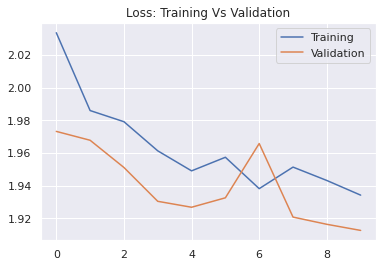

In [ ]:
plt.title('Loss: Training Vs Validation')
plt.plot(history1.history['loss'], label='Training')
plt.plot(history1.history['val_loss'], label='Validation')
plt.legend()
plt.show()

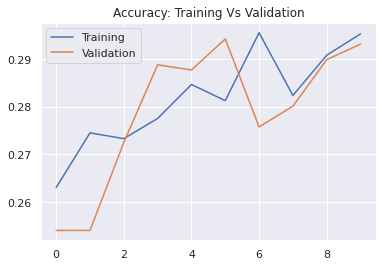

In [ ]:
plt.title('Accuracy: Training Vs Validation')
plt.plot(history1.history['accuracy'], label='Training')
plt.plot(history1.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

In [ ]:
# Step 5: Make Predictions


#Bad Religion
new_lyrics = ["Infected Now here I go, Hope I don't break down, I won't take anything, I don't need anything, Don't want to exist, I can't persist, Please stop before I do it again, Just talk about nothing, let's talk about nothing, Let's talk about no one, please talk about no one, Someone, anyone... (Refrão) You and me have a disease, You affect me, you infect me, I'm afflicted, you're addicted, You and me, you and me... I'm on the edge, Get against the wall, I'm so distracted, I love to strike you, Here's my confession, You learned your lesson, Stop me before I do it again Just talk about nothing, let's talk about nothing, Let's talk about no one, please talk about no one, Someone, anyone... (Refrão) You're clear - as a heavy lead curtain want to drill you - Like an ocean, We can work it out, I've been running out, now I'm Running out Don't be mad about it baby, Yeah yeah yeah (5x) You and me, you and me, I want to tie you, crucify you, Kneel before you, revile your body, You and me, we're made in heaven, I want to take you, I want to break you, Supplicate you, with thorny roses, You and me, are incurable, I want to bathe you in holy water, I want to kill you, Upon the alter, you and me, you and me..."]


seq = tokenizer.texts_to_sequences(new_lyrics)
padded = pad_sequences(seq, maxlen=1000, padding="post", truncating="post")
pred = model1.predict(padded)
labels = ['elvis presley', 'chris brown', 'elvis costello', 'ella fitzgerald', 'the rolling stones', 'bee gees', 'glee', 'bad religion', 'beyonce', 'elton john']
print(pred, labels[np.argmax(pred)])

[[0.12499056 0.12270299 0.06948585 0.0180171  0.16228388 0.17954949
  0.09860143 0.00692861 0.11264858 0.10479148]] bee gees


#### ***Model 2: Fresh (Multi Layers LSTM with Dropouts):***

As we have seen before, Multi-layer LSTM with Dropouts gave us one of the highest accuracy therefore we have used the same as the pre-trained model. But now, we want the same architecture but instead of using it as pre-trained we want to use it from the beginning, that is the weight will be recalculated for this dataset. 


For the parameter we have used batch size =64, embedding dimension = 30, No_of_epoch = 5, optimizer = Adam and the metrics used for evaluation is accuracy. Sparse Categorical cross entropy is used to measure loss at each iteration, since it is a multi-classification problem, Softmax activation is used to get probabilistic values for each class and with this dataset, we have achieved 43% accuracy with the validation data.


In [ ]:
############################## MULTI LAYER LSTM MODEL WITH DROPOUTS #########################

# 1. Define a Network
modelMultiLSTMWDrop2 = Sequential()

modelMultiLSTMWDrop2.add(Embedding(vocab_size3, EmbeddingDim, input_length=max_length2))
modelMultiLSTMWDrop2.add(Dropout(0.3)) 
modelMultiLSTMWDrop2.add(LSTM(64, return_sequences=True))
modelMultiLSTMWDrop2.add(Dropout(0.3))
modelMultiLSTMWDrop2.add(LSTM(32, return_sequences=True))
modelMultiLSTMWDrop2.add(Dropout(0.3))
modelMultiLSTMWDrop2.add(Dense(100, activation='relu')) 
modelMultiLSTMWDrop2.add(Dropout(0.3))
modelMultiLSTMWDrop2.add(Flatten())
modelMultiLSTMWDrop2.add(Dense(10, activation='softmax')) 

print(modelMultiLSTMWDrop2.summary()) 

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 1000, 50)          1166350   
_________________________________________________________________
dropout_60 (Dropout)         (None, 1000, 50)          0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 1000, 64)          29440     
_________________________________________________________________
dropout_61 (Dropout)         (None, 1000, 64)          0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 1000, 32)          12416     
_________________________________________________________________
dropout_62 (Dropout)         (None, 1000, 32)          0         
_________________________________________________________________
dense_34 (Dense)             (None, 1000, 100)       

In [ ]:
# 2. Compile Modle

optim = tf.keras.optimizers.Adam(lr=0.0001) 
metrics = ["accuracy"]
loss = 'sparse_categorical_crossentropy'

modelMultiLSTMWDrop2.compile(loss=loss, optimizer=optim, metrics=metrics)

In [ ]:
# Step 3: Fit Network
epochs = 5
batch_size = 64

histmodelMultiLSTMWDrop2 = modelMultiLSTMWDrop2.fit(lyrics2_train_padded, Artist_train, 
                                          epochs=epochs, 
                                          batch_size = batch_size, 
                                          validation_data=(lyrics2_valid_padded, Artist_valid), 
                                          verbose=1)

Epoch 1/5
130/130 [==============================] - 224s 2s/step - loss: 2.2091 - accuracy: 0.2195 - val_loss: 1.9865 - val_accuracy: 0.2508
Epoch 2/5
130/130 [==============================] - 226s 2s/step - loss: 1.9653 - accuracy: 0.2676 - val_loss: 1.8077 - val_accuracy: 0.3322
Epoch 3/5
130/130 [==============================] - 228s 2s/step - loss: 1.7052 - accuracy: 0.3780 - val_loss: 1.6462 - val_accuracy: 0.4017
Epoch 4/5
130/130 [==============================] - 233s 2s/step - loss: 1.4868 - accuracy: 0.4361 - val_loss: 1.5555 - val_accuracy: 0.4343
Epoch 5/5
130/130 [==============================] - 228s 2s/step - loss: 1.3404 - accuracy: 0.5027 - val_loss: 1.5109 - val_accuracy: 0.4799


In [ ]:
modelMultiLSTMWDrop2.save('/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/saved_models/modelMultiLSTMWDrop2.h5')

In [ ]:
#Step 4: Evaluate Network
loss, accuracy = modelMultiLSTMWDrop2.evaluate(lyrics2_valid_padded, Artist_valid)
print('Test set Loss:{:0.3f}\n Accuracy {:0.3f}'.format(loss, accuracy))

29/29 [==============================] - 6s 222ms/step - loss: 1.5109 - accuracy: 0.4799
Test set Loss:1.511
 Accuracy 0.480


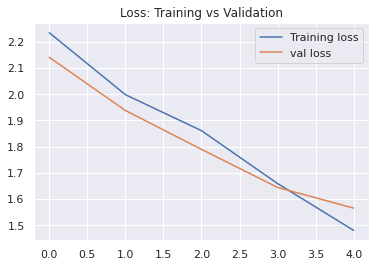

In [ ]:
plt.title('Loss: Training vs Validation')
plt.plot(histmodelMultiLSTMWDrop2.history['loss'], label='Training loss')
plt.plot(histmodelMultiLSTMWDrop2.history['val_loss'], label='val loss')
plt.legend()
plt.show()

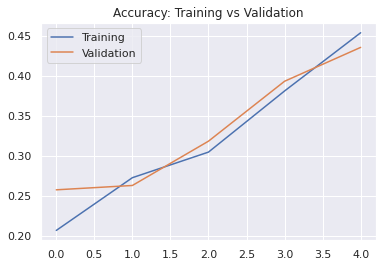

In [ ]:
plt.title('Accuracy: Training vs Validation')
plt.plot(histmodelMultiLSTMWDrop2.history['accuracy'], label='Training')
plt.plot(histmodelMultiLSTMWDrop2.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

In [ ]:
# Step 5: Make Predictions


#Bad Religion
new_lyrics = ["Infected Now here I go, Hope I don't break down, I won't take anything, I don't need anything, Don't want to exist, I can't persist, Please stop before I do it again, Just talk about nothing, let's talk about nothing, Let's talk about no one, please talk about no one, Someone, anyone... (Refrão) You and me have a disease, You affect me, you infect me, I'm afflicted, you're addicted, You and me, you and me... I'm on the edge, Get against the wall, I'm so distracted, I love to strike you, Here's my confession, You learned your lesson, Stop me before I do it again Just talk about nothing, let's talk about nothing, Let's talk about no one, please talk about no one, Someone, anyone... (Refrão) You're clear - as a heavy lead curtain want to drill you - Like an ocean, We can work it out, I've been running out, now I'm Running out Don't be mad about it baby, Yeah yeah yeah (5x) You and me, you and me, I want to tie you, crucify you, Kneel before you, revile your body, You and me, we're made in heaven, I want to take you, I want to break you, Supplicate you, with thorny roses, You and me, are incurable, I want to bathe you in holy water, I want to kill you, Upon the alter, you and me, you and me..."]


seq = tokenizer.texts_to_sequences(new_lyrics)
padded = pad_sequences(seq, maxlen=1000, padding="post", truncating="post")
pred = modelMultiLSTMWDrop2.predict(padded)
labels = ['elvis presley', 'chris brown', 'elvis costello', 'ella fitzgerald', 'the rolling stones', 'bee gees', 'glee', 'bad religion', 'beyonce', 'elton john']
print(pred, labels[np.argmax(pred)])

[[0.2476813  0.00232976 0.12249242 0.09264875 0.10721747 0.10419084
  0.12367072 0.08656258 0.05475572 0.05845039]] elvis presley


#### ***Model 3: Pre-trained (CNN with Heterogenous layes):***

CNN with a heterogeneous layer is another model that gave us higher accuracy (24.9%) with the testing dataset. So we have saved this model in a serialized format (.h5) and then use the same for the classification of Artist. We have frozen all the layers except the last layer which is then replaced by a new dense layer with a Softmax activation function. 


For the parameter we have used batch size =64, embedding dimension = 30, No_of_epoch = 5, optimizer = Adam and the metrics used for evaluation is accuracy. Sparse Categorical cross entropy is used to measure loss at each iteration, since it is a multi-class classification problem, Softmax activation is used to get probabilistic values for each class and with this dataset, we have achieved 25% accuracy with the validation data.


In [ ]:
from keras import models
############ Loading the model which is saved along with the parameters ######################
bestmodel2 = models.load_model('/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/saved_models/modelMultiCNN.h5')

In [ ]:
## Trainable is set to false for all the layers except the last layer
for layer in bestmodel2.layers[:-1]:  
    layer.trainable = False

In [ ]:
for layer in bestmodel2.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f0678450c50> False
<tensorflow.python.keras.layers.embeddings.Embedding object at 0x7f0678450bd0> False
<tensorflow.python.keras.layers.embeddings.Embedding object at 0x7f0678454450> False
<tensorflow.python.keras.layers.embeddings.Embedding object at 0x7f0678454790> False
<tensorflow.python.keras.layers.convolutional.Conv1D object at 0x7f0678450ed0> False
<tensorflow.python.keras.layers.convolutional.Conv1D object at 0x7f0678441d50> False
<tensorflow.python.keras.layers.convolutional.Conv1D object at 0x7f06785b5450> False
<tensorflow.python.keras.layers.core.Dropout object at 0x7f0678457e90> False
<tensorflow.python.keras.layers.core.Dropout object at 0x7f0678457f10> False
<tensorflow.python.keras.layers.core.Dropout object at 0x7f0678619ed0> False
<tensorflow.python.keras.layers.pooling.MaxPooling1D object at 0x7f0678619410> False
<tensorflow.python.keras.layers.pooling.MaxPooling1D object at 0x7f067864bcd0> False
<t

In [ ]:
# 1. Define the Network
model2 = models.Sequential()
model2.add(bestmodel2)
model2.add(Dense(10, activation='softmax'))

print(model2.summary())

# Step 2: Compile Network
optim = tf.keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]
loss = 'sparse_categorical_crossentropy'

model2.compile(loss=loss, optimizer=optim, metrics=metrics) 

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 10)                51430706  
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
Total params: 51,430,816
Trainable params: 2,120
Non-trainable params: 51,428,696
_________________________________________________________________
None


In [ ]:
# Step 3: Fit Network
epochs = 5
batch_size = 64

history2 = model2.fit(lyrics2_train_padded, Artist_train, 
                      epochs=epochs, 
                      batch_size = batch_size, 
                      validation_data=(lyrics2_valid_padded, Artist_valid), 
                      verbose=1)

Epoch 1/5
130/130 [==============================] - 146s 1s/step - loss: 2.2877 - accuracy: 0.1355 - val_loss: 2.2461 - val_accuracy: 0.2237
Epoch 2/5
130/130 [==============================] - 145s 1s/step - loss: 2.2273 - accuracy: 0.2436 - val_loss: 2.1988 - val_accuracy: 0.2313
Epoch 3/5
130/130 [==============================] - 144s 1s/step - loss: 2.1721 - accuracy: 0.2599 - val_loss: 2.1574 - val_accuracy: 0.2378
Epoch 4/5
130/130 [==============================] - 147s 1s/step - loss: 2.1316 - accuracy: 0.2676 - val_loss: 2.1290 - val_accuracy: 0.2476
Epoch 5/5
130/130 [==============================] - 144s 1s/step - loss: 2.1144 - accuracy: 0.2612 - val_loss: 2.1086 - val_accuracy: 0.2476


In [ ]:
#Step 4: Evaluate Network
loss, accuracy = model2.evaluate(lyrics2_valid_padded, Artist_valid)
print('Test set Loss:{:0.3f}\n Accuracy {:0.3f}'.format(loss, accuracy))

29/29 [==============================] - 14s 482ms/step - loss: 2.1086 - accuracy: 0.2476
Test set Loss:2.109
 Accuracy 0.248


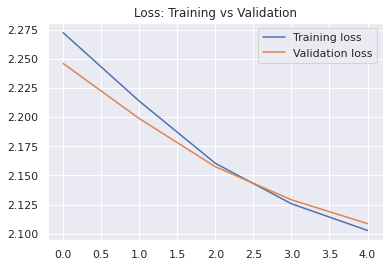

In [ ]:
plt.title('Loss: Training vs Validation')
plt.plot(history2.history['loss'], label='Training loss')
plt.plot(history2.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

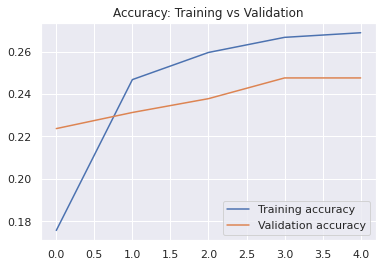

In [ ]:
plt.title('Accuracy: Training vs Validation')
plt.plot(history2.history['accuracy'], label='Training accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [ ]:
# Step 5: Make Predictions


#Bad Religion
new_lyrics = ["Infected Now here I go, Hope I don't break down, I won't take anything, I don't need anything, Don't want to exist, I can't persist, Please stop before I do it again, Just talk about nothing, let's talk about nothing, Let's talk about no one, please talk about no one, Someone, anyone... (Refrão) You and me have a disease, You affect me, you infect me, I'm afflicted, you're addicted, You and me, you and me... I'm on the edge, Get against the wall, I'm so distracted, I love to strike you, Here's my confession, You learned your lesson, Stop me before I do it again Just talk about nothing, let's talk about nothing, Let's talk about no one, please talk about no one, Someone, anyone... (Refrão) You're clear - as a heavy lead curtain want to drill you - Like an ocean, We can work it out, I've been running out, now I'm Running out Don't be mad about it baby, Yeah yeah yeah (5x) You and me, you and me, I want to tie you, crucify you, Kneel before you, revile your body, You and me, we're made in heaven, I want to take you, I want to break you, Supplicate you, with thorny roses, You and me, are incurable, I want to bathe you in holy water, I want to kill you, Upon the alter, you and me, you and me..."]


seq = tokenizer.texts_to_sequences(new_lyrics)
padded = pad_sequences(seq, maxlen=1000, padding="post", truncating="post")
pred = model2.predict(padded)
labels = ['elvis presley', 'chris brown', 'elvis costello', 'ella fitzgerald', 'the rolling stones', 'bee gees', 'glee', 'bad religion', 'beyonce', 'elton john']
print(pred, labels[np.argmax(pred)])

[[0.06276044 0.29050785 0.0985797  0.03387571 0.08172237 0.06675246
  0.11159955 0.05349286 0.1450346  0.05567444]] chris brown


#### ***Model 4: Fresh (CNN with Heterogenous layes):***

As we have seen before, CNN with a heterogeneous layer gave us one of the highest accuracy therefore we have used the same as the pre-trained model. But now, we want the same architecture but instead of using it as pre-trained we want to use it from the beginning, that is the weight will be recalculated for this dataset. 

For the parameter we have used batch size =64, embedding dimension = 30, No_of_epoch = 5, optimizer = Adam and the metrics used for evaluation is accuracy. Sparse Categorical cross entropy is used to measure loss at each iteration, since it is a multi-class classification problem, Softmax activation is used to get probabilistic values for each class and with this dataset, we have achieved 43% accuracy with the validation data.

As we can observe that the new architecture performed much (83% to 25%) better when compared with the pre-trained model.


In [ ]:
######################### CNN MODEL with multiple Layers and of diffrent Kernel Sizes #########################################
from keras import regularizers,models
import tensorflow as tf
from keras.layers import Input, concatenate
from keras.models import Model
max_lyrics_length = 1000 
vocab_size = no_of_words # 50000
length = max_lyrics_length
inputs = Input(shape=(length,))

################## Impelmenting Channel 1###################################################
embedding1 = Embedding(vocab_size3, 50)(inputs)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPooling1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)

################## Impelmenting Channel 2 ###############################################
embedding2 = Embedding(vocab_size3, 50)(inputs)
conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPooling1D(pool_size=2)(drop2)
flat2 = Flatten()(pool2)

################### Impelmenting Channel 3 ###############################################
embedding3 = Embedding(vocab_size3, 50)(inputs)
conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPooling1D(pool_size=2)(drop3)
flat3 = Flatten()(pool3)

# ##################Merging all the channels ###############################################
merged = concatenate([flat1, flat2, flat3])

################## Final Model Building ###############################################
dense1 = Dense(200, activation='relu')(merged)
outputs = Dense(10, activation='softmax')(dense1)
modelMultiCNN2 = Model(inputs=[inputs], outputs=outputs)
################## Complie the model with adam optimizer ###############################################
modelMultiCNN2.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])
# summarize
print(modelMultiCNN2.summary())

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1000)]       0                                            
__________________________________________________________________________________________________
embedding_20 (Embedding)        (None, 1000, 50)     1166350     input_3[0][0]                    
__________________________________________________________________________________________________
embedding_21 (Embedding)        (None, 1000, 50)     1166350     input_3[0][0]                    
__________________________________________________________________________________________________
embedding_22 (Embedding)        (None, 1000, 50)     1166350     input_3[0][0]                    
____________________________________________________________________________________________

In [ ]:
historymodelMultiCNN2 = modelMultiCNN2.fit(lyrics2_train_padded, Artist_train, validation_data=(lyrics2_valid_padded, Artist_valid), epochs=5, batch_size=64, verbose=1)

Epoch 1/5
130/130 [==============================] - 89s 678ms/step - loss: 2.0216 - accuracy: 0.2924 - val_loss: 1.4475 - val_accuracy: 0.5049
Epoch 2/5
130/130 [==============================] - 88s 676ms/step - loss: 0.9937 - accuracy: 0.6849 - val_loss: 0.7655 - val_accuracy: 0.7676
Epoch 3/5
130/130 [==============================] - 88s 678ms/step - loss: 0.3058 - accuracy: 0.9183 - val_loss: 0.6556 - val_accuracy: 0.8078
Epoch 4/5
130/130 [==============================] - 88s 675ms/step - loss: 0.1116 - accuracy: 0.9760 - val_loss: 0.6401 - val_accuracy: 0.8100
Epoch 5/5
130/130 [==============================] - 88s 677ms/step - loss: 0.0544 - accuracy: 0.9874 - val_loss: 0.6305 - val_accuracy: 0.8132


In [ ]:
loss, accuracy = modelMultiCNN2.evaluate(lyrics2_valid_padded, Artist_valid)
print('Test set Loss:{:0.3f}\n Accuracy {:0.3f}'.format(loss, accuracy))

29/29 [==============================] - 2s 76ms/step - loss: 0.6305 - accuracy: 0.8132
Test set Loss:0.631
 Accuracy 0.813


In [ ]:
modelMultiCNN2.save("/content/drive/MyDrive/MSc in Data Science/SPEC 9993 Deep Learning/Assignment/saved_models/modelMultiCNN2.h5")

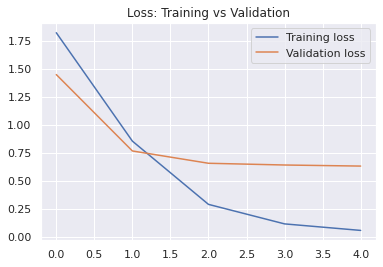

In [ ]:
plt.title('Loss: Training vs Validation')
plt.plot(historymodelMultiCNN2.history['loss'], label='Training loss')
plt.plot(historymodelMultiCNN2.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

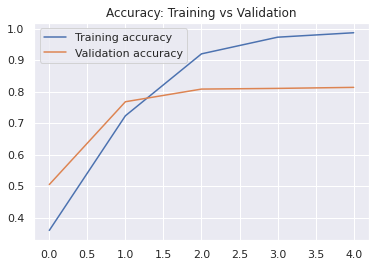

In [ ]:
plt.title('Accuracy: Training vs Validation')
plt.plot(historymodelMultiCNN2.history['accuracy'], label='Training accuracy')
plt.plot(historymodelMultiCNN2.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [ ]:
# Step 5: Make Predictions


#Bad Religion
new_lyrics = ["Infected Now here I go, Hope I don't break down, I won't take anything, I don't need anything, Don't want to exist, I can't persist, Please stop before I do it again, Just talk about nothing, let's talk about nothing, Let's talk about no one, please talk about no one, Someone, anyone... (Refrão) You and me have a disease, You affect me, you infect me, I'm afflicted, you're addicted, You and me, you and me... I'm on the edge, Get against the wall, I'm so distracted, I love to strike you, Here's my confession, You learned your lesson, Stop me before I do it again Just talk about nothing, let's talk about nothing, Let's talk about no one, please talk about no one, Someone, anyone... (Refrão) You're clear - as a heavy lead curtain want to drill you - Like an ocean, We can work it out, I've been running out, now I'm Running out Don't be mad about it baby, Yeah yeah yeah (5x) You and me, you and me, I want to tie you, crucify you, Kneel before you, revile your body, You and me, we're made in heaven, I want to take you, I want to break you, Supplicate you, with thorny roses, You and me, are incurable, I want to bathe you in holy water, I want to kill you, Upon the alter, you and me, you and me..."]


seq = tokenizer.texts_to_sequences(new_lyrics)
padded = pad_sequences(seq, maxlen=1000, padding="post", truncating="post")
pred = modelMultiCNN2.predict(padded)
labels = ['elvis presley', 'chris brown', 'elvis costello', 'ella fitzgerald', 'the rolling stones', 'bee gees', 'glee', 'bad religion', 'beyonce', 'elton john']
print(pred, labels[np.argmax(pred)])

[[9.2023234e-05 1.0772035e-04 3.3841853e-03 3.1660153e-03 1.7705451e-03
  1.0494710e-02 6.6720468e-01 9.4513014e-02 1.0445290e-02 2.0882180e-01]] glee
